In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from itertools import product


dow_jones_df = pd.read_csv("dow_jones_data_clean.csv")

# Display the first few rows and column names of the dataset
dow_jones_df.head(), dow_jones_df.columns

(                        Date  Adj Close     Close      High       Low  \
 0  1980-12-12 00:00:00+00:00   0.098943  0.128348  0.128906  0.128348   
 1  1980-12-15 00:00:00+00:00   0.093781  0.121652  0.122210  0.121652   
 2  1980-12-16 00:00:00+00:00   0.086898  0.112723  0.113281  0.112723   
 3  1980-12-17 00:00:00+00:00   0.089049  0.115513  0.116071  0.115513   
 4  1980-12-18 00:00:00+00:00   0.091630  0.118862  0.119420  0.118862   
 
        Open     Volume Ticker  
 0  0.128348  469033600   AAPL  
 1  0.122210  175884800   AAPL  
 2  0.113281  105728000   AAPL  
 3  0.115513   86441600   AAPL  
 4  0.118862   73449600   AAPL  ,
 Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
        'Ticker'],
       dtype='object'))

In [2]:
dow_jones_df.info()
dow_jones_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361538 entries, 0 to 361537
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date       361538 non-null  object 
 1   Adj Close  361538 non-null  float64
 2   Close      361538 non-null  float64
 3   High       361538 non-null  float64
 4   Low        361538 non-null  float64
 5   Open       361538 non-null  float64
 6   Volume     361538 non-null  int64  
 7   Ticker     361538 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 22.1+ MB


Date      Adj Close          Close  \
count                      361538  361538.000000  361538.000000   
unique                      15821            NaN            NaN   
top     2012-04-20 00:00:00+00:00            NaN            NaN   
freq                           28            NaN            NaN   
mean                          NaN      34.735950      44.823122   
std                           NaN      59.699655      64.121151   
min                           NaN       0.002845       0.005208   
25%                           NaN       1.324075       4.270833   
50%                           NaN      11.948401      21.945000   
75%                           NaN      40.156898      55.970001   
max                           NaN     605.400024     605.400024   

                 High            Low           Open        Volume  Ticker  
count   361538.000000  361538.000000  361538.000000  3.615380e+05  361538  
unique            NaN            NaN            NaN           NaN      28  
top               NaN            NaN            NaN           NaN      KO  
freq              NaN            NaN            NaN           NaN   15821  
mean        45.261430      44.365490      44.636039  2.053661e+07     NaN  
std         64.724787      63.490108      64.223467  8.102556e+07     NaN  
min          0.005208       0.004801       0.000000  0.000000e+00     NaN  
25%          4.312500       4.226386       3.733622  2.124347e+06     NaN  
50%         22.187500      21.690001      21.920000  5.294992e+06     NaN  
75%         56.500000      55.408287      55.972920  1.253280e+07     NaN  
max        608.630005     597.880005     604.260010  7.421641e+09     NaN

In [3]:
# Check for missing values
missing_values = dow_jones_df.isnull().sum()
missing_values

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
Ticker       0
dtype: int64

In [4]:
# Convert 'Date' column to datetime format
dow_jones_df['Date'] = pd.to_datetime(dow_jones_df['Date'])

# Set 'Date' as the index
dow_jones_df.set_index('Date', inplace=True)

# Display the updated DataFrame
dow_jones_df.head()

Adj Close     Close      High       Low      Open  \
Date                                                                           
1980-12-12 00:00:00+00:00   0.098943  0.128348  0.128906  0.128348  0.128348   
1980-12-15 00:00:00+00:00   0.093781  0.121652  0.122210  0.121652  0.122210   
1980-12-16 00:00:00+00:00   0.086898  0.112723  0.113281  0.112723  0.113281   
1980-12-17 00:00:00+00:00   0.089049  0.115513  0.116071  0.115513  0.115513   
1980-12-18 00:00:00+00:00   0.091630  0.118862  0.119420  0.118862  0.118862   

                              Volume Ticker  
Date                                         
1980-12-12 00:00:00+00:00  469033600   AAPL  
1980-12-15 00:00:00+00:00  175884800   AAPL  
1980-12-16 00:00:00+00:00  105728000   AAPL  
1980-12-17 00:00:00+00:00   86441600   AAPL  
1980-12-18 00:00:00+00:00   73449600   AAPL

for ticker in dow_jones_df['Ticker'].unique():
    ticker_data = dow_jones_df[dow_jones_df['Ticker'] == ticker]
    
    # Create a new figure for each ticker
    plt.figure(figsize=(14, 7))
    plt.plot(ticker_data.index, ticker_data['Close'], label=ticker)
    
    plt.title(f'Time Series of Closing Prices for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

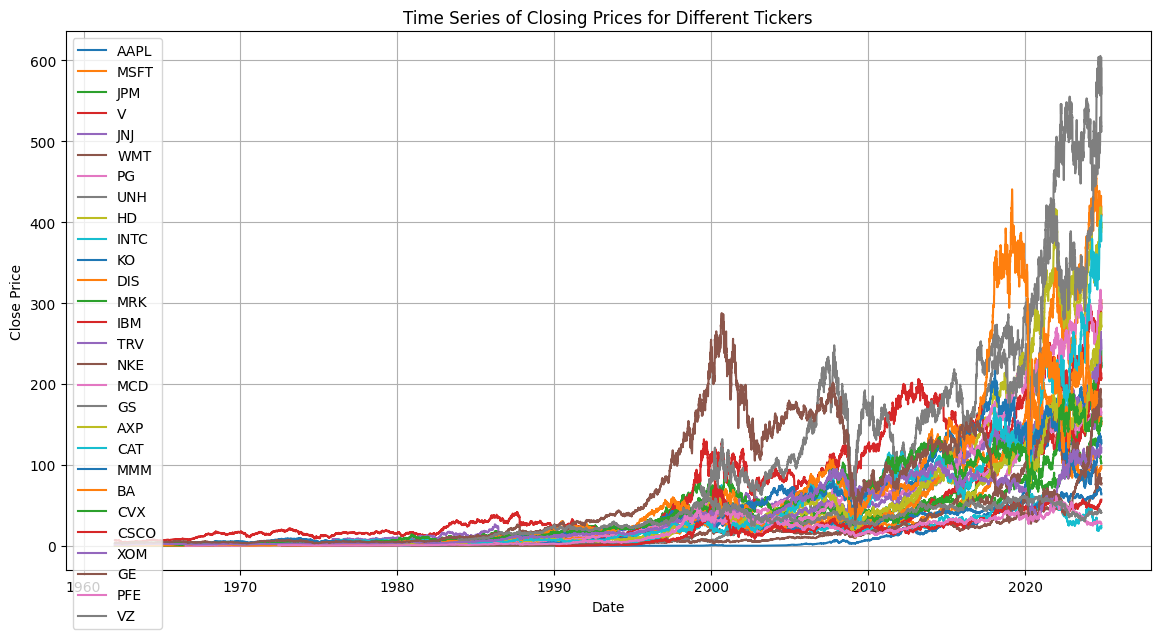

In [5]:
plt.figure(figsize=(14, 7))
for ticker in dow_jones_df['Ticker'].unique():
    ticker_data = dow_jones_df[dow_jones_df['Ticker'] == ticker]
    plt.plot(ticker_data.index, ticker_data['Close'], label=ticker)

plt.title('Time Series of Closing Prices for Different Tickers')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

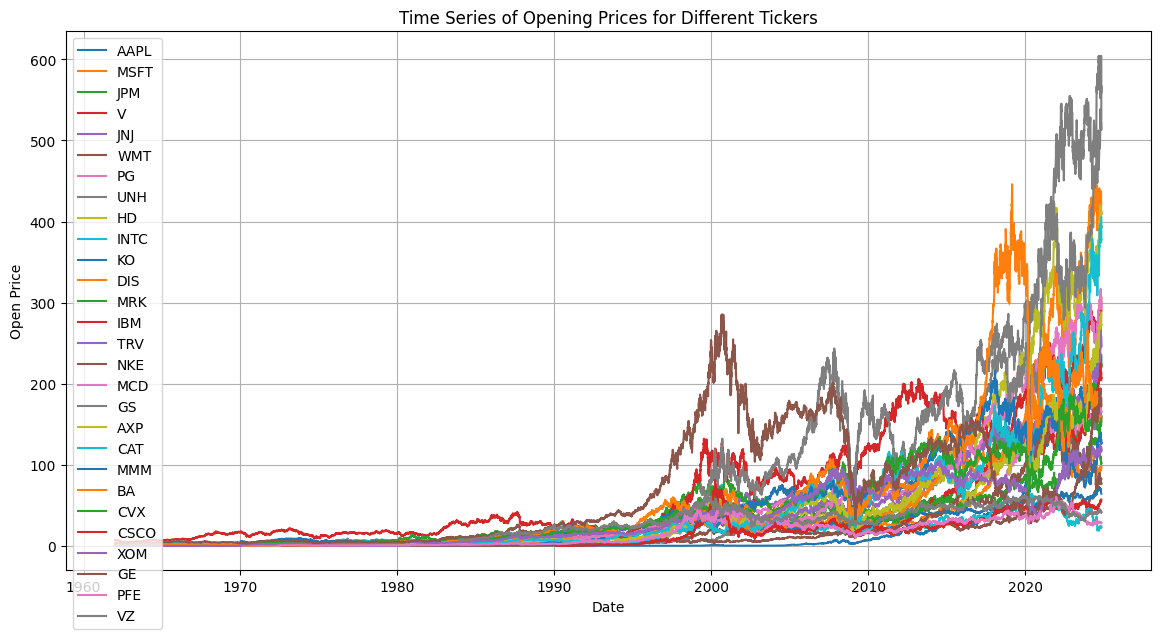

In [6]:
plt.figure(figsize=(14, 7))
for ticker in dow_jones_df['Ticker'].unique():
    ticker_data = dow_jones_df[dow_jones_df['Ticker'] == ticker]
    plt.plot(ticker_data.index, ticker_data['Open'], label=ticker)

plt.title('Time Series of Opening Prices for Different Tickers')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.grid(True)
plt.show()

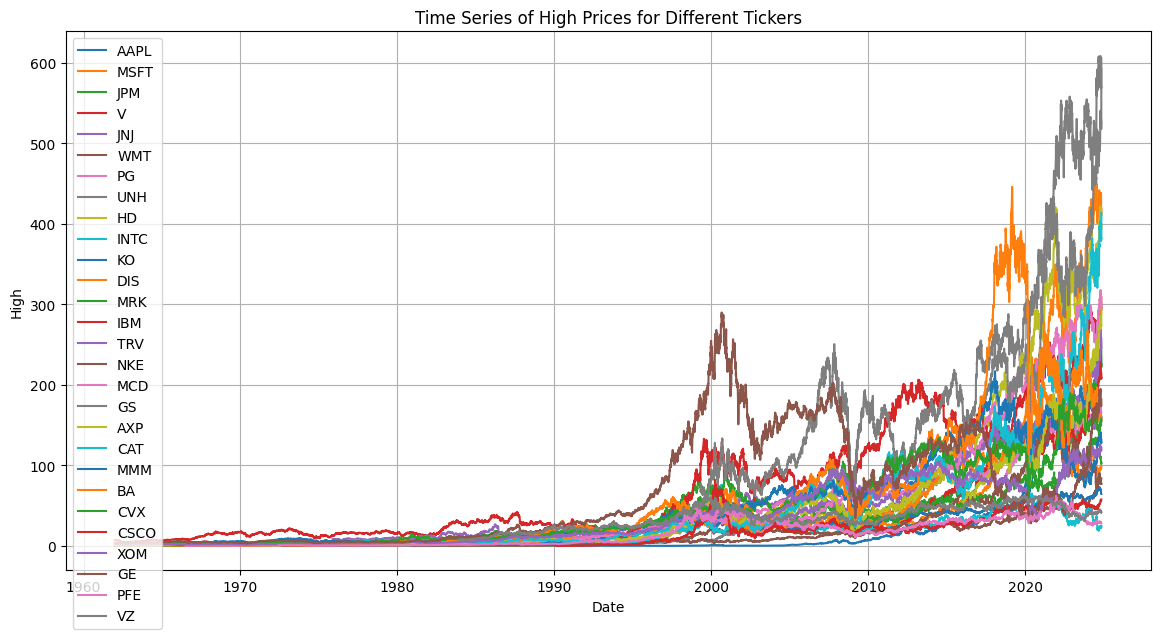

In [7]:
plt.figure(figsize=(14, 7))
for ticker in dow_jones_df['Ticker'].unique():
    ticker_data = dow_jones_df[dow_jones_df['Ticker'] == ticker]
    plt.plot(ticker_data.index, ticker_data['High'], label=ticker)

plt.title('Time Series of High Prices for Different Tickers')
plt.xlabel('Date')
plt.ylabel('High')
plt.legend()
plt.grid(True)
plt.show()

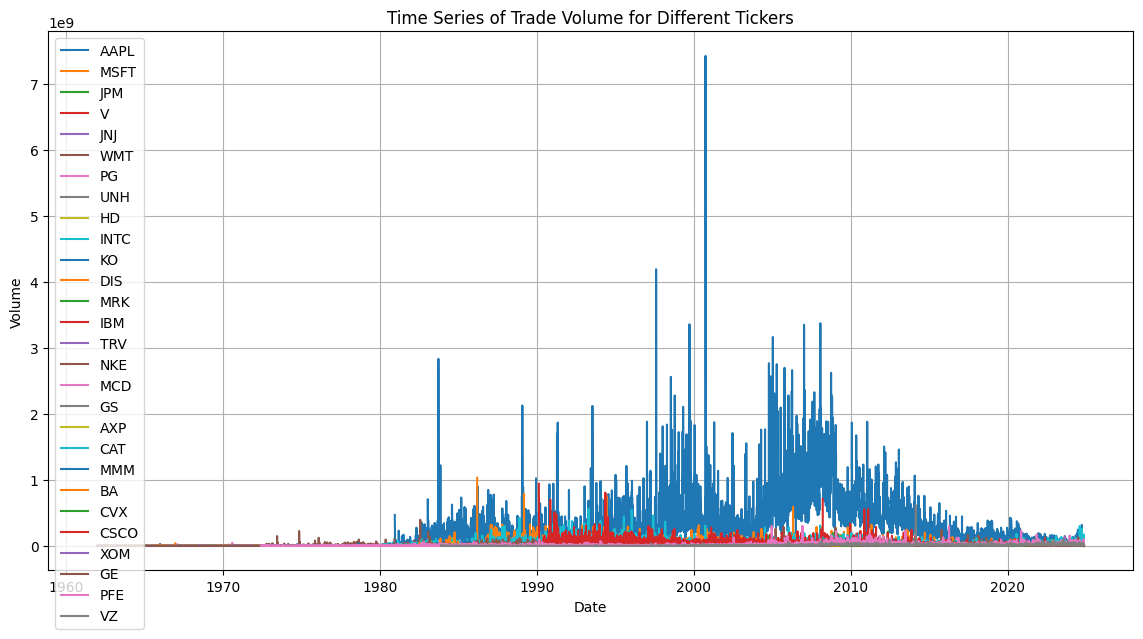

In [8]:
plt.figure(figsize=(14, 7))
for ticker in dow_jones_df['Ticker'].unique():
    ticker_data = dow_jones_df[dow_jones_df['Ticker'] == ticker]
    plt.plot(ticker_data.index, ticker_data['Volume'], label=ticker)

plt.title('Time Series of Trade Volume for Different Tickers')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


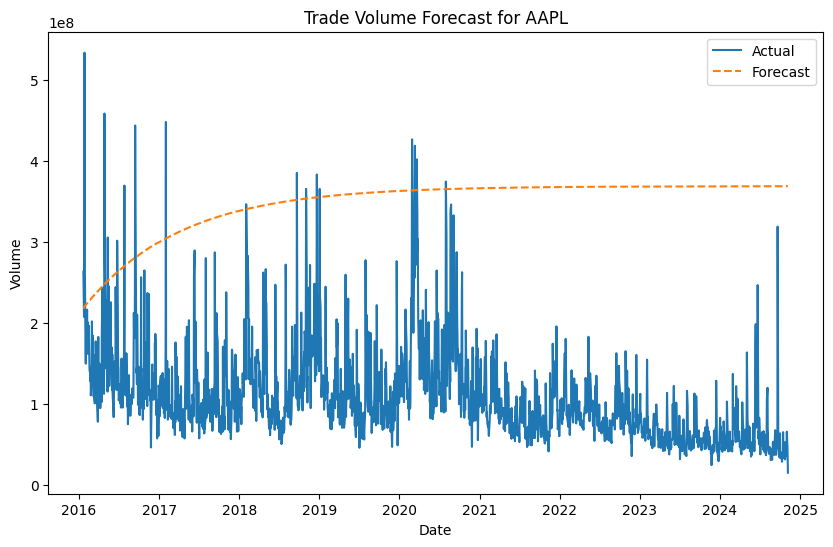

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


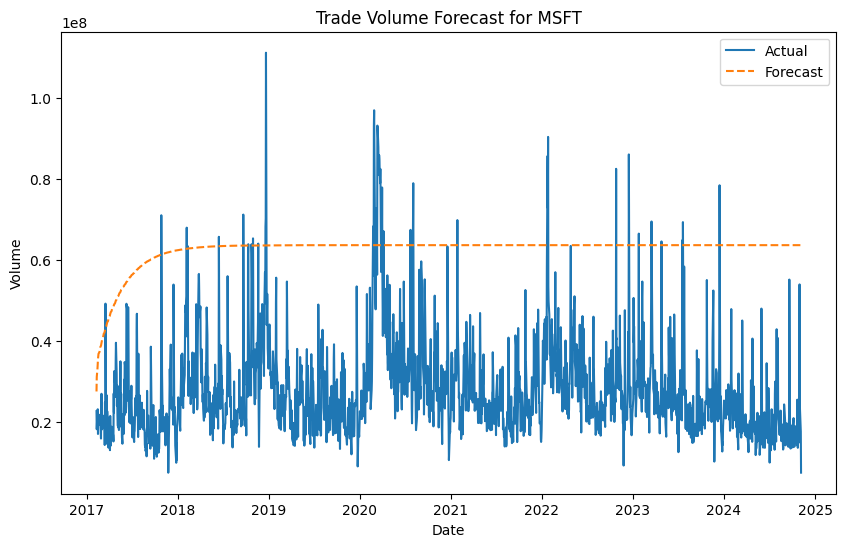

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


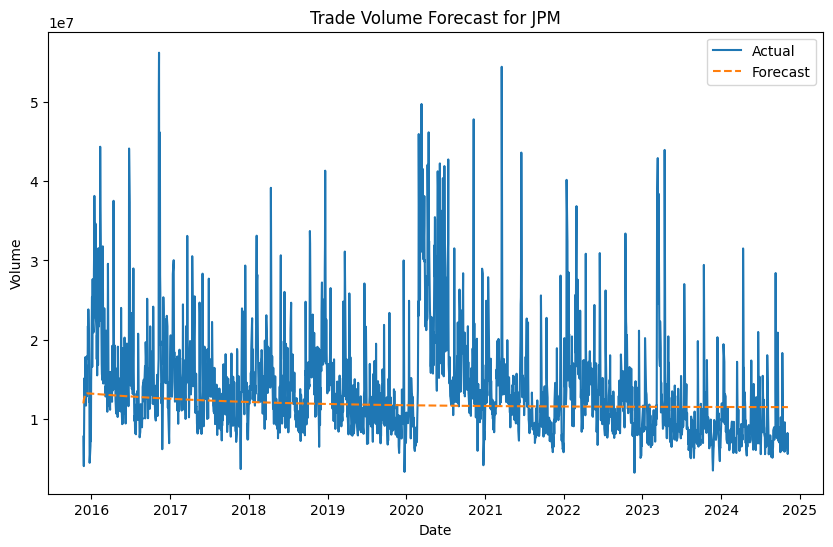

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


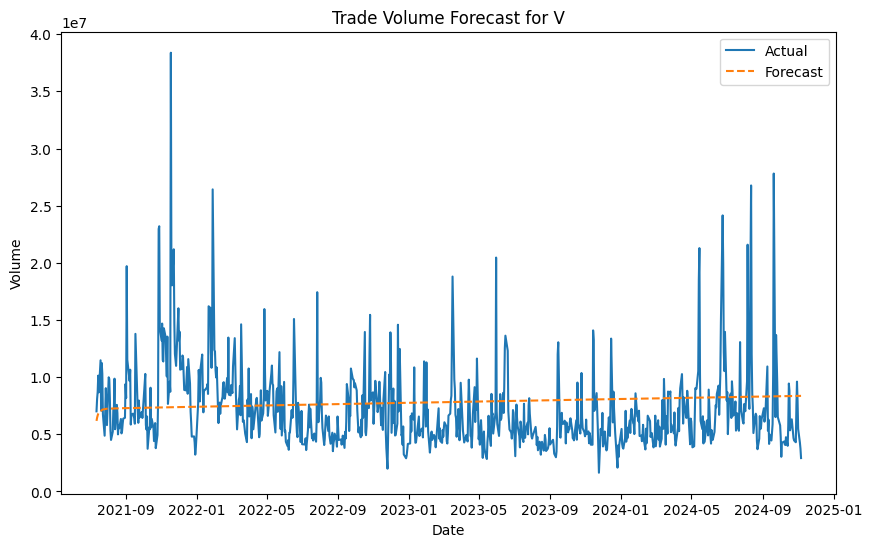

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


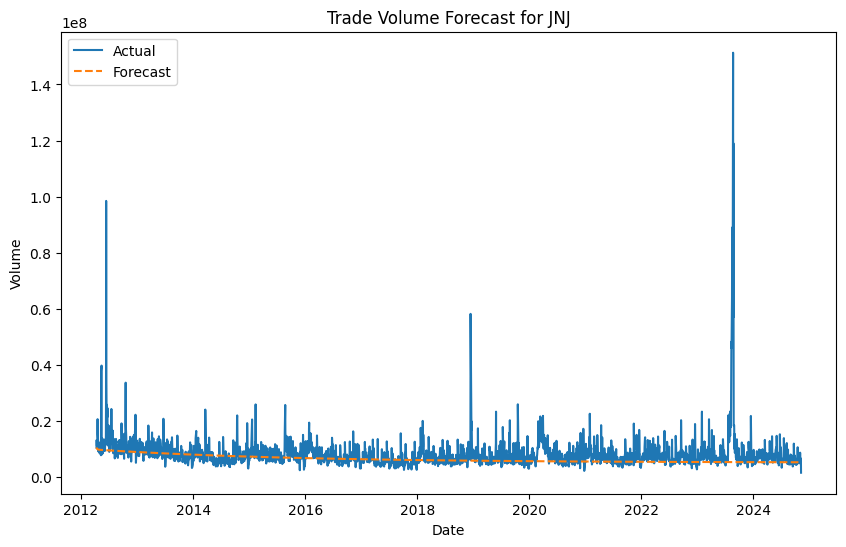

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


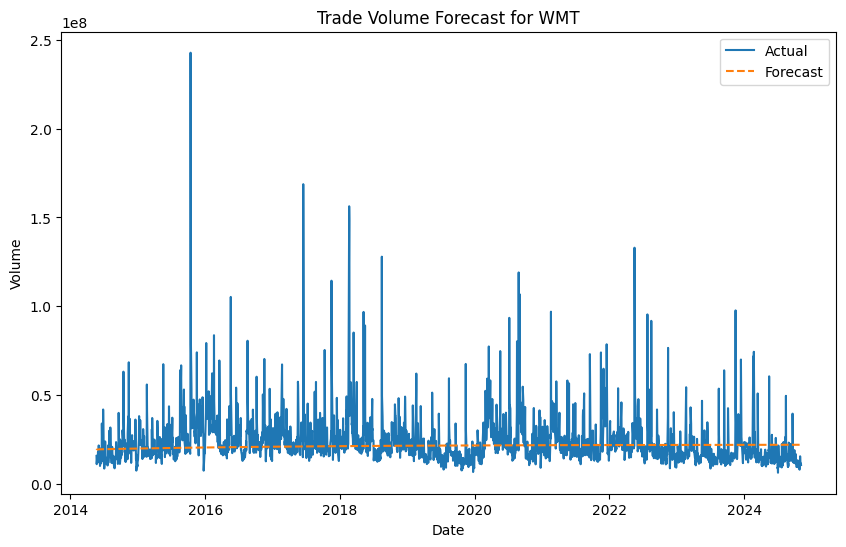

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


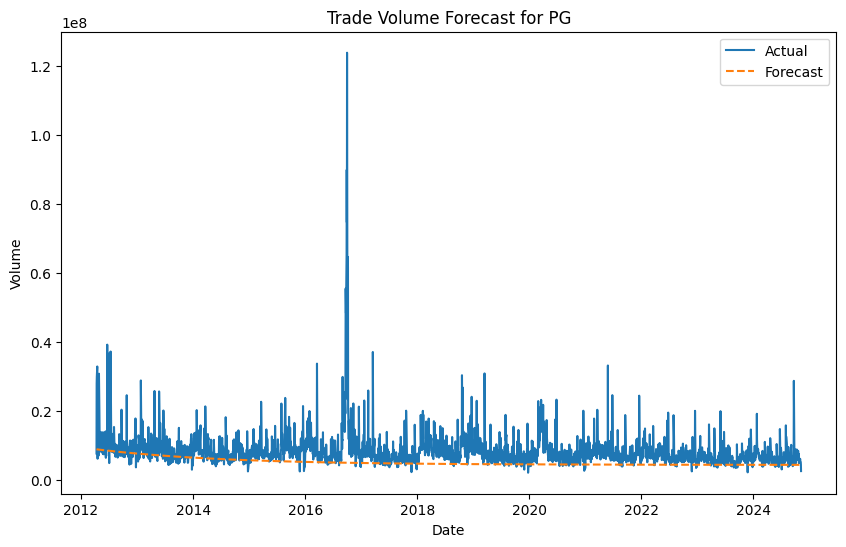

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


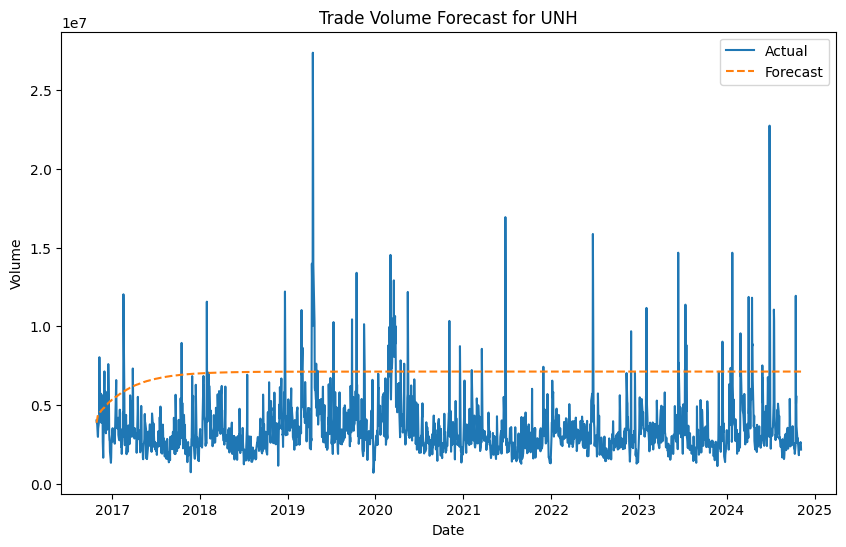

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


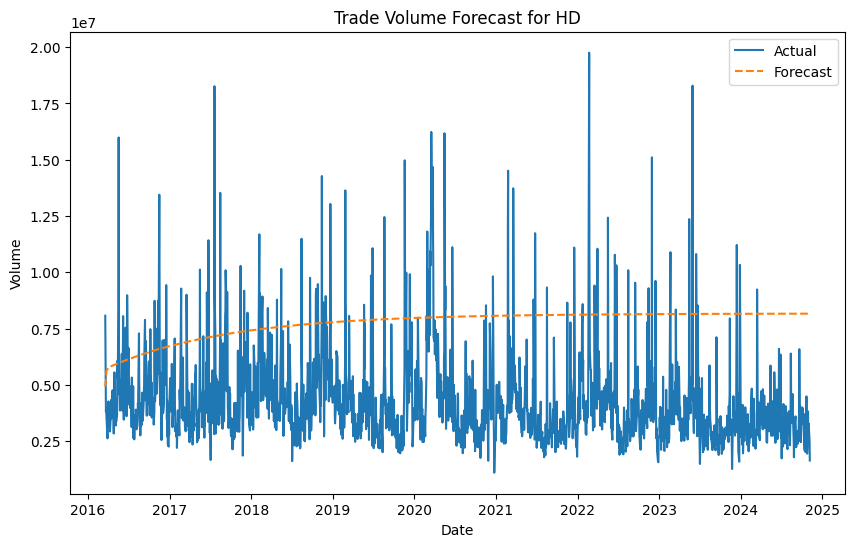

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


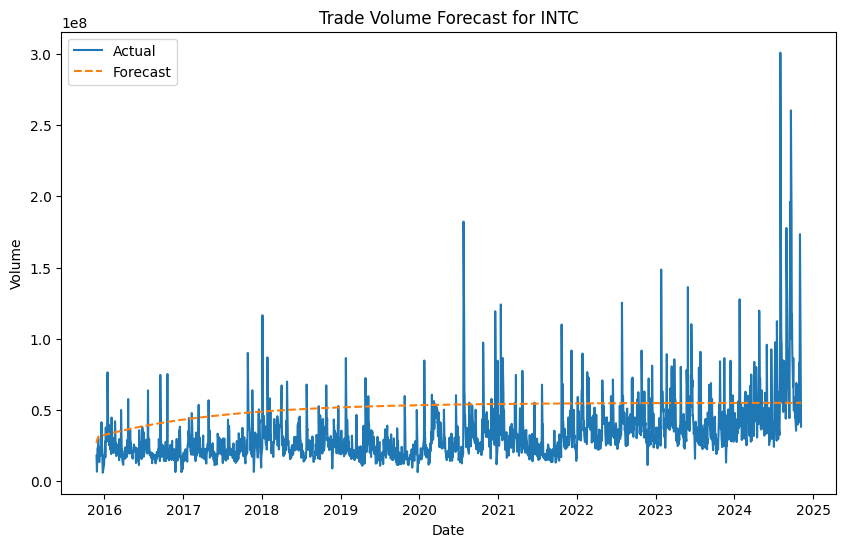

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


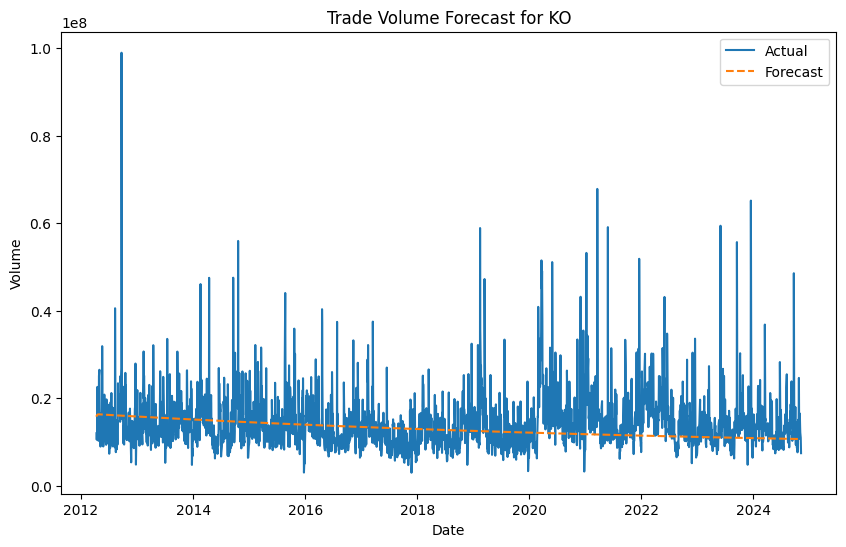

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


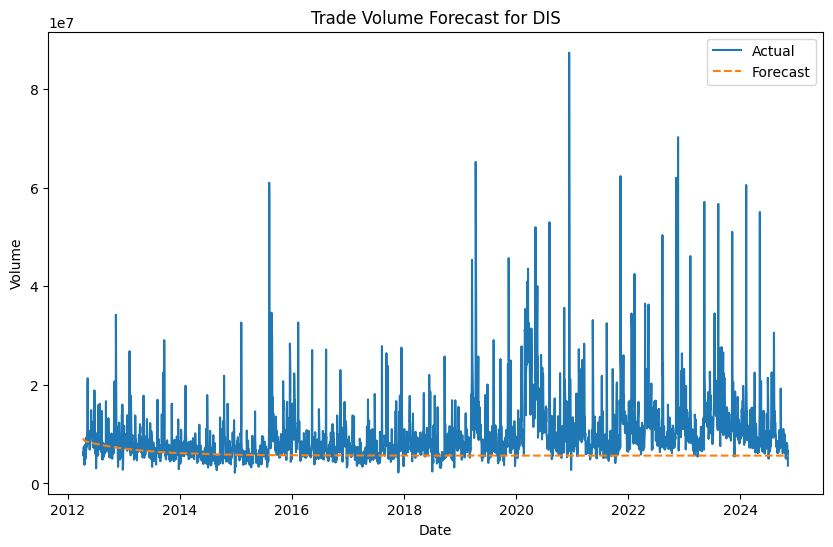

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


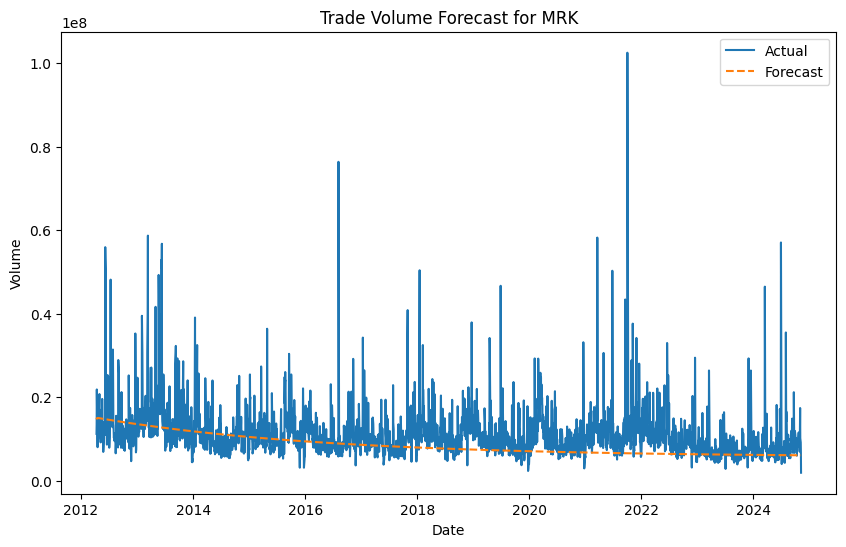

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


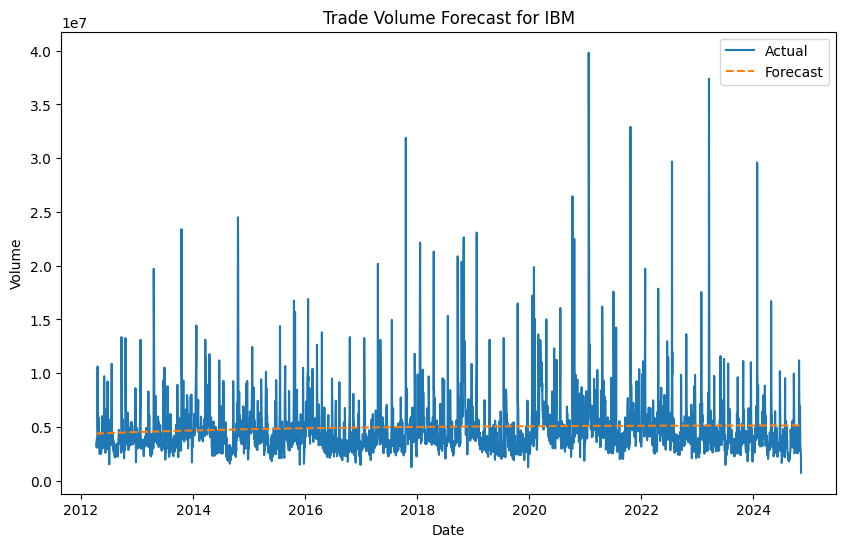

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


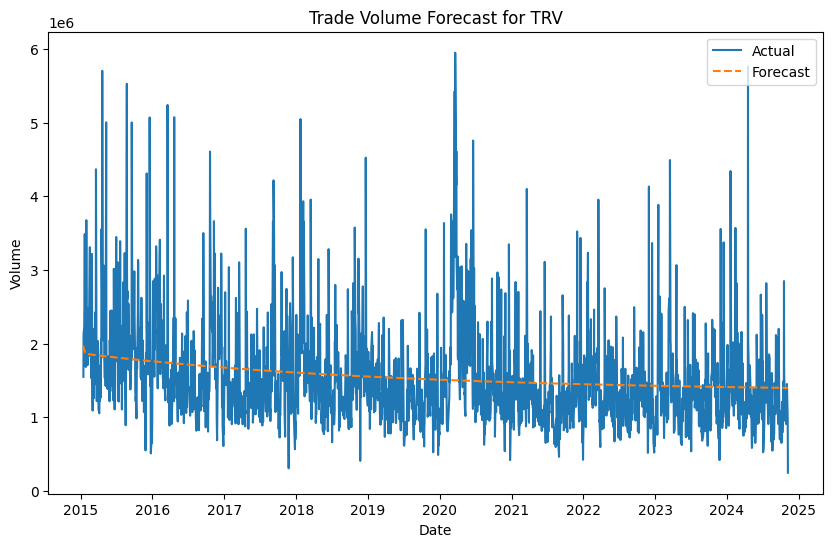

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


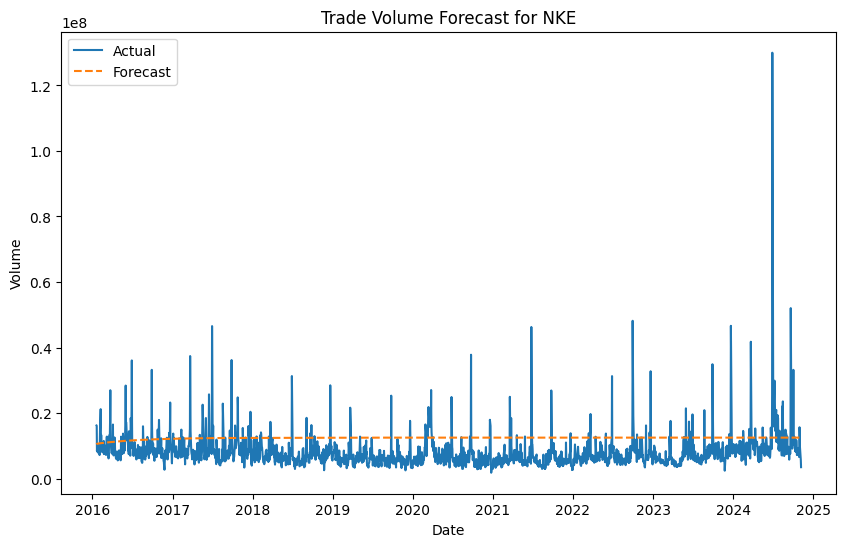

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


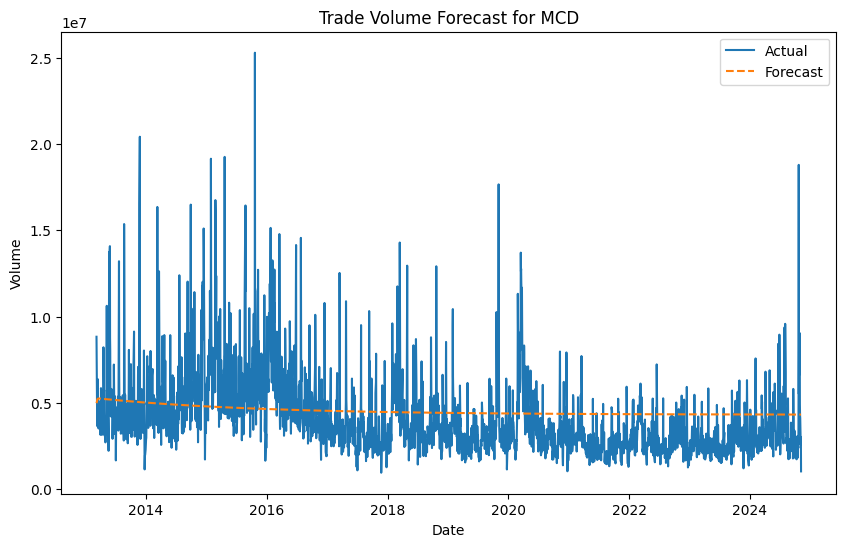

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


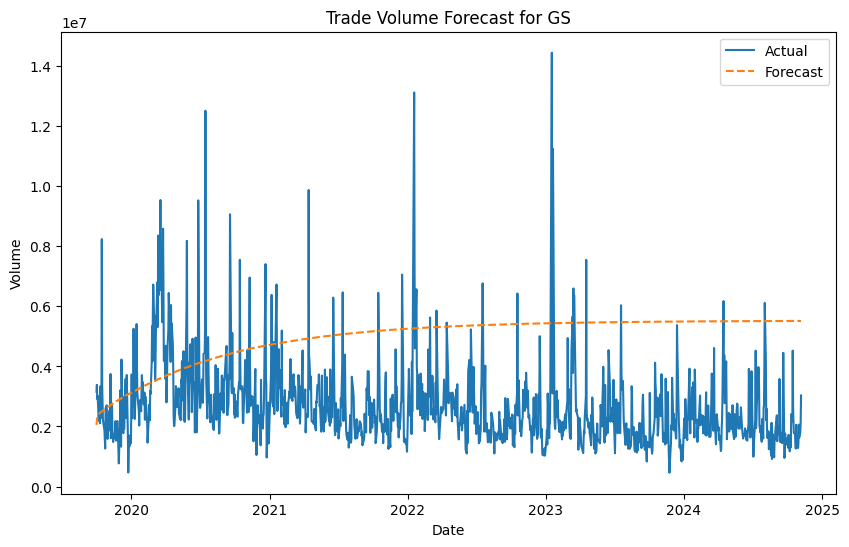

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


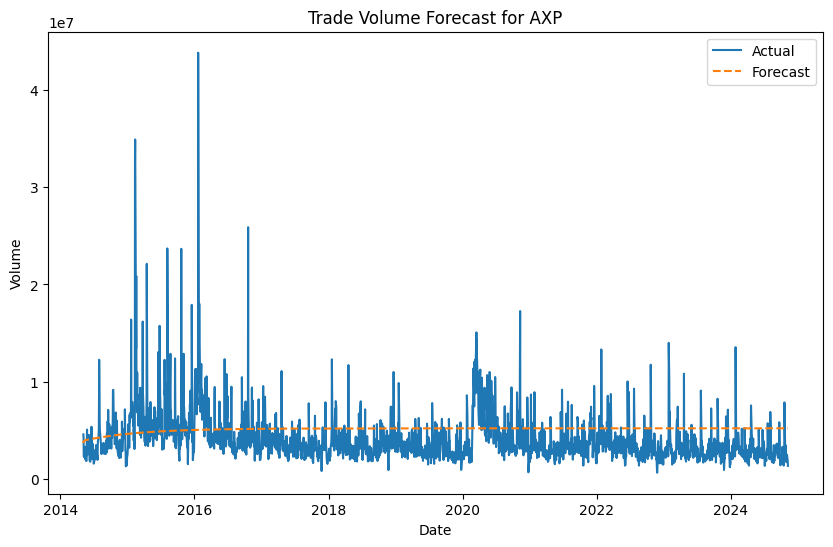

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


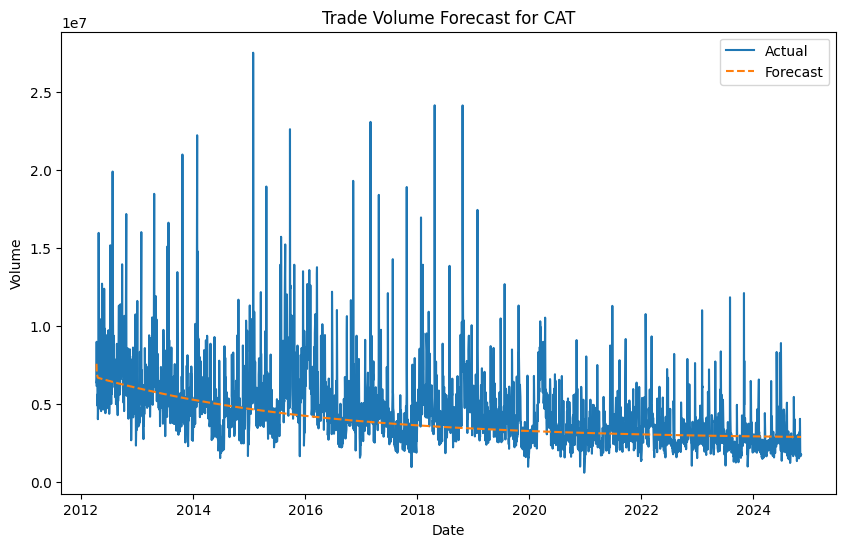

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


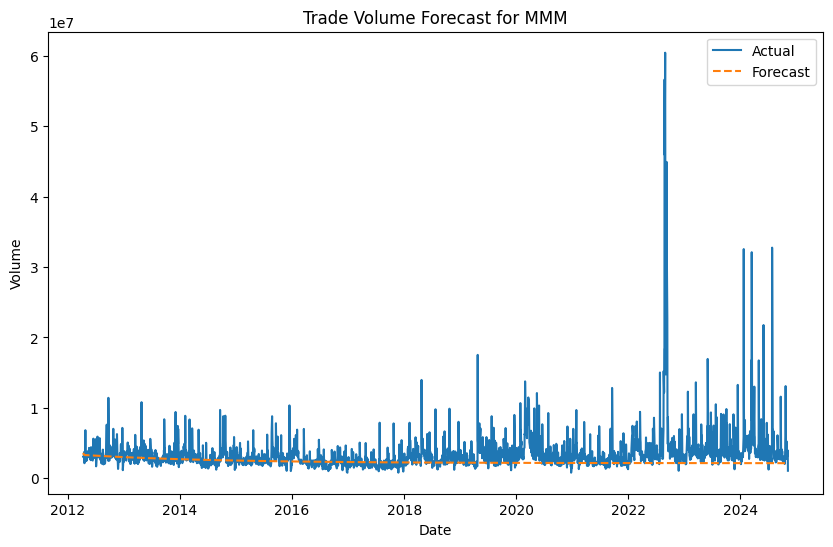

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


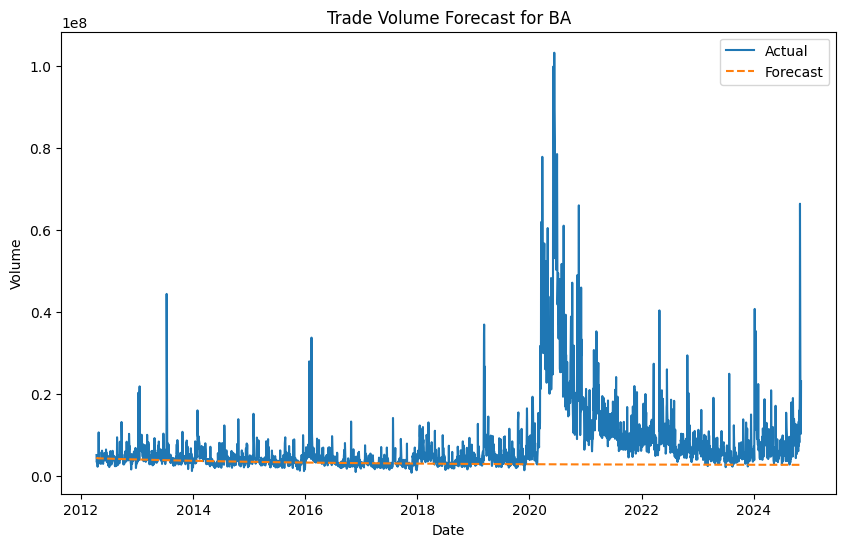

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


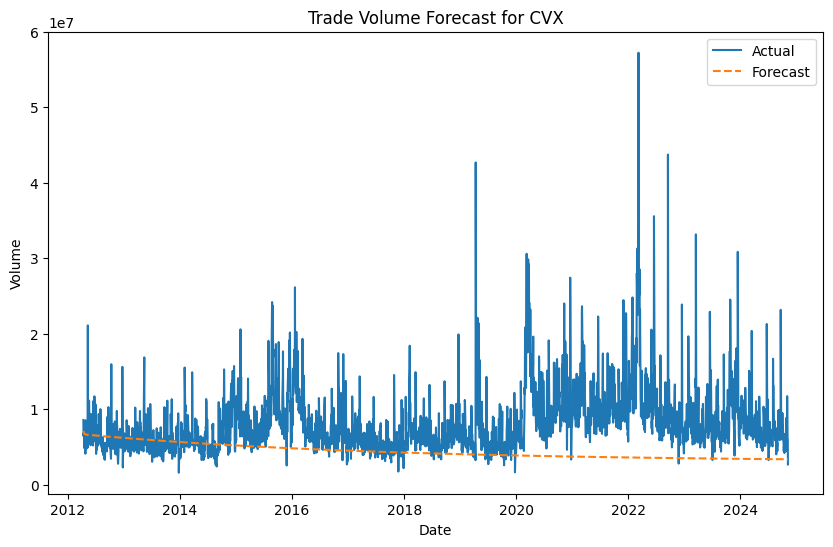

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


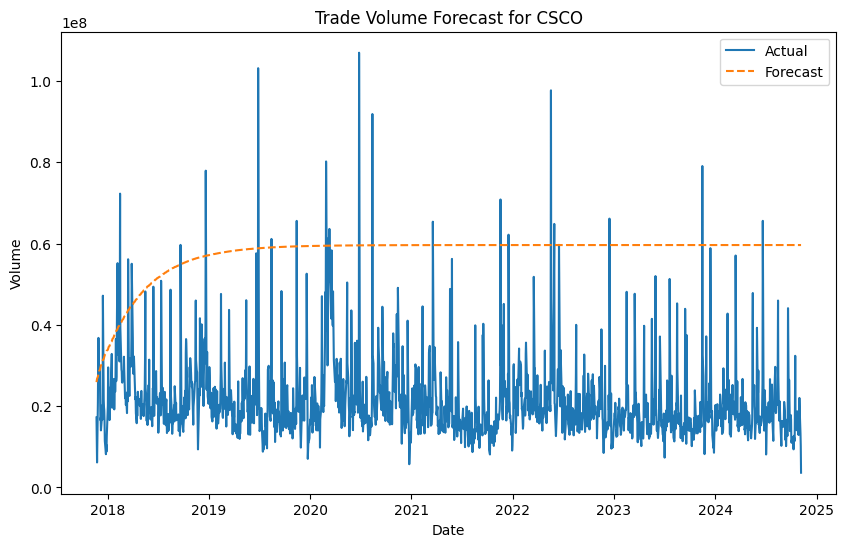

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


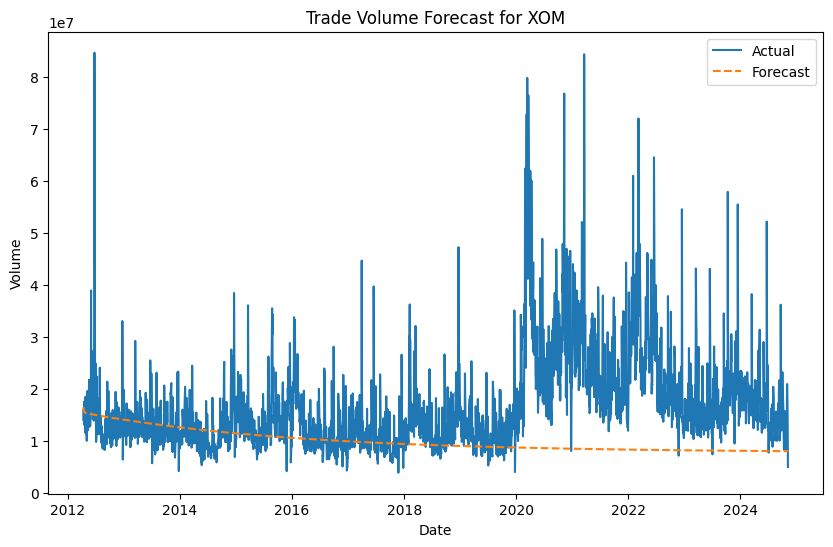

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


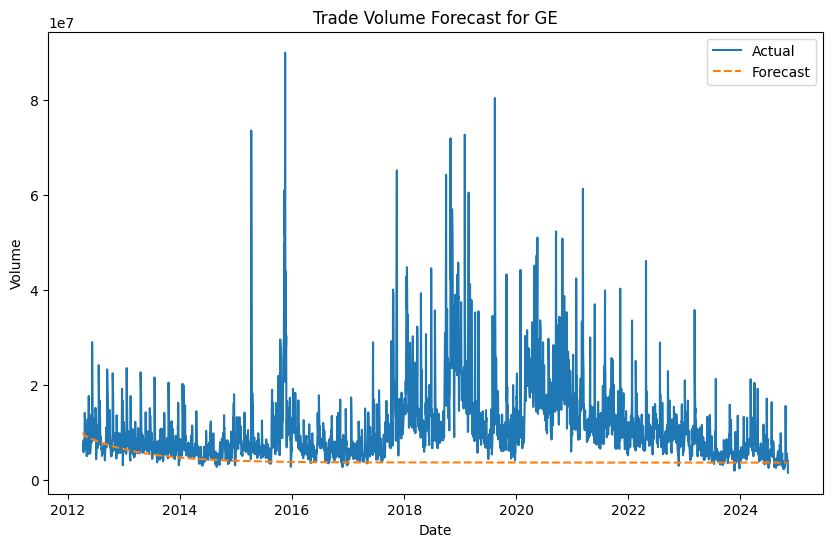

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


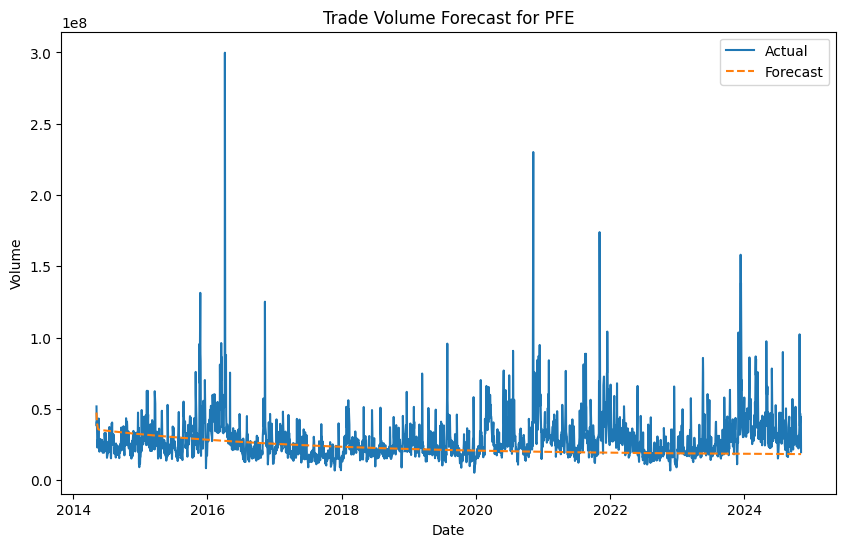

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/op

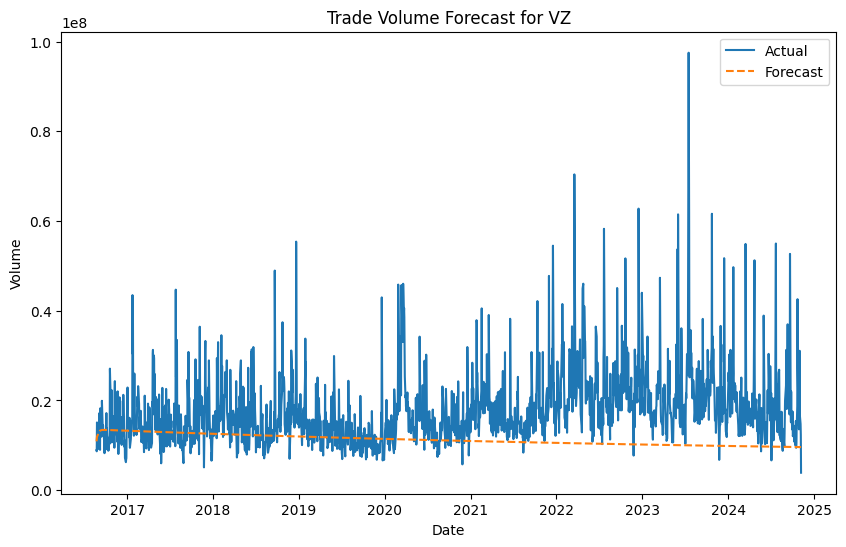

ARIMA Summary for AAPL:
                               SARIMAX Results                                
Dep. Variable:                 Volume   No. Observations:                 8854
Model:                 ARIMA(2, 0, 2)   Log Likelihood             -182291.698
Date:                Wed, 27 Nov 2024   AIC                         364595.396
Time:                        23:38:17   BIC                         364637.928
Sample:                             0   HQIC                        364609.880
                               - 8854                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.687e+08   4.58e-13   8.05e+20      0.000    3.69e+08    3.69e+08
ar.L1          1.5439      0.017     90.809      0.000       1.511       1.577
ar.L2         -0.5454      0

In [13]:
# Initialize a dictionary to store ARIMA models and forecasts for each stock
arima_results = {}

# Loop through each stock ticker in the dataset
for ticker in dow_jones_df['Ticker'].unique():
    stock_data = dow_jones_df[dow_jones_df['Ticker'] == ticker]
    stock_data = stock_data['Volume']  # Extract the 'Volume' column

    # Train-test split (80-20)
    train_size = int(len(stock_data) * 0.8)
    train, test = stock_data[:train_size], stock_data[train_size:]

    # Fit an ARIMA model (order can be adjusted)
    model = ARIMA(train, order=(2, 0, 2))  # Example ARIMA(5,1,0) order
    model_fit = model.fit()

    # Forecast on test data
    forecast = model_fit.forecast(steps=len(test))

    # Store results
    arima_results[ticker] = {
        'model': model_fit,
        'forecast': forecast,
        'test': test
    }

    # Plot actual vs forecast
    plt.figure(figsize=(10, 6))
    plt.plot(test.index, test, label='Actual')
    plt.plot(test.index, forecast, label='Forecast', linestyle='--')
    plt.title(f'Trade Volume Forecast for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.show()

# Example: Access ARIMA model summary for a specific stock
ticker_example = list(arima_results.keys())[0]
print(f"ARIMA Summary for {ticker_example}:")
print(arima_results[ticker_example]['model'].summary())

Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


276/276 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - loss: 8.5288e-04 - val_loss: 6.8387e-04
Epoch 2/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - loss: 8.6621e-04 - val_loss: 6.3397e-04
Epoch 3/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - loss: 7.6530e-04 - val_loss: 6.0751e-04
Epoch 4/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - loss: 8.5648e-04 - val_loss: 5.5910e-04
Epoch 5/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - loss: 7.5596e-04 - val_loss: 5.6076e-04
Epoch 6/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - loss: 7.2941e-04 - val_loss: 5.9314e-04
Epoch 7/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 12s 42ms/step - loss: 0.0010 - val_loss: 5.3883e-04
Epoch 8/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 8.6182e-04 - val_loss: 5.4058e-04
Epoch 9/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 9.6727e-04 - val_loss: 5.6383e-04
Epoch 10/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - loss: 8.9424e-04 - val_loss: 5.2981e-04
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


276/276 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 9.9502e-04 - val_loss: 9.3504e-04
Epoch 2/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 7.7254e-04 - val_loss: 8.5985e-04
Epoch 3/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 6.2968e-04 - val_loss: 8.1737e-04
Epoch 4/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 7.8622e-04 - val_loss: 7.9888e-04
Epoch 5/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 7.4640e-04 - val_loss: 7.8425e-04
Epoch 6/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - loss: 6.8630e-04 - val_loss: 8.2553e-04
Epoch 7/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 7.0570e-04 - val_loss: 7.9606e-04
Epoch 8/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 6.1422e-04 - val_loss: 8.3286e-04
Epoch 9/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - loss: 6.8080e-04 - val_loss: 7.8068e-04
Epoch 10/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - loss: 7.4456e-04 - val_loss: 8.0646e-04
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
Epoch 1/10

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


276/276 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - loss: 0.0011 - val_loss: 6.3501e-04
Epoch 2/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 7.9959e-04 - val_loss: 5.9936e-04
Epoch 3/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 7.1029e-04 - val_loss: 9.1542e-04
Epoch 4/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 0.0010 - val_loss: 5.0727e-04
Epoch 5/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 6.6612e-04 - val_loss: 5.0997e-04
Epoch 6/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 7.3423e-04 - val_loss: 5.0195e-04
Epoch 7/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 8.7321e-04 - val_loss: 5.0715e-04
Epoch 8/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 7.5494e-04 - val_loss: 4.8986e-04
Epoch 9/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 6.0491e-04 - val_loss: 4.9615e-04
Epoch 10/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 7.4746e-04 - val_loss: 5.6483e-04
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


276/276 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - loss: 0.0013 - val_loss: 6.3117e-04
Epoch 2/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 8.5642e-04 - val_loss: 5.8905e-04
Epoch 3/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 8.2073e-04 - val_loss: 6.5962e-04
Epoch 4/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - loss: 7.3783e-04 - val_loss: 5.6565e-04
Epoch 5/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 7.6543e-04 - val_loss: 5.7966e-04
Epoch 6/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 6.4501e-04 - val_loss: 0.0010
Epoch 7/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 9.1143e-04 - val_loss: 6.5103e-04
Epoch 8/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 0.0010 - val_loss: 5.9828e-04
Epoch 9/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 12s 42ms/step - loss: 7.5333e-04 - val_loss: 6.0169e-04
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


276/276 ━━━━━━━━━━━━━━━━━━━━ 24s 72ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 2/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 6.8190e-04 - val_loss: 0.0011
Epoch 3/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 23s 84ms/step - loss: 6.5603e-04 - val_loss: 0.0011
Epoch 4/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 6.4556e-04 - val_loss: 0.0010
Epoch 5/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 6.6592e-04 - val_loss: 0.0011
Epoch 6/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 6.5948e-04 - val_loss: 0.0011
Epoch 7/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 6.1461e-04 - val_loss: 0.0010
Epoch 8/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - loss: 6.2560e-04 - val_loss: 0.0010
Epoch 9/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 7.1720e-04 - val_loss: 9.8252e-04
Epoch 10/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 6.2680e-04 - val_loss: 0.0010
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step


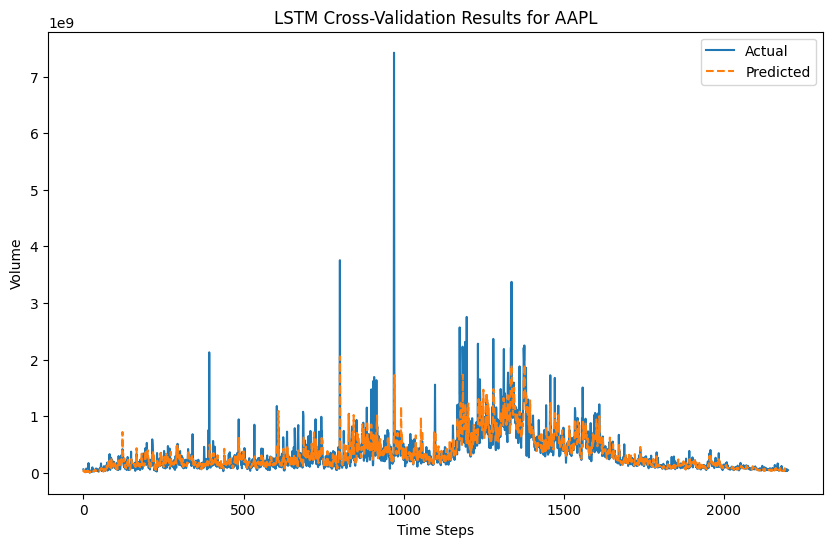

Cross-Validation Results for AAPL:
Fold MSE: [2.9182213730333292e+16, 4.300055066158285e+16, 2.69821244683426e+16, 3.1156308646292948e+16, 5.411789849468232e+16]
Average MSE: 36887819200246800.0000
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


243/243 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - loss: 0.0015 - val_loss: 8.2167e-04
Epoch 2/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 7.9458e-04 - val_loss: 7.8238e-04
Epoch 3/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - loss: 8.1661e-04 - val_loss: 8.2149e-04
Epoch 4/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 8.1255e-04 - val_loss: 7.4028e-04
Epoch 5/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - loss: 8.2870e-04 - val_loss: 7.2436e-04
Epoch 6/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - loss: 6.7300e-04 - val_loss: 7.5922e-04
Epoch 7/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - loss: 6.7537e-04 - val_loss: 7.5328e-04
Epoch 8/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0012 - val_loss: 7.3055e-04
Epoch 9/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 7.4958e-04 - val_loss: 7.3434e-04
Epoch 10/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - loss: 9.1842e-04 - val_loss: 7.3716e-04
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


243/243 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 2/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 7.7383e-04 - val_loss: 0.0010
Epoch 3/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 9.3480e-04 - val_loss: 0.0010
Epoch 4/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - loss: 8.8128e-04 - val_loss: 9.8842e-04
Epoch 5/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 6.7394e-04 - val_loss: 9.7919e-04
Epoch 6/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 7.0480e-04 - val_loss: 9.9684e-04
Epoch 7/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 6.3509e-04 - val_loss: 9.6443e-04
Epoch 8/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 7.4813e-04 - val_loss: 9.6846e-04
Epoch 9/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - loss: 6.8986e-04 - val_loss: 9.8160e-04
Epoch 10/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - loss: 8.7383e-04 - val_loss: 9.9435e-04
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


243/243 ━━━━━━━━━━━━━━━━━━━━ 16s 45ms/step - loss: 0.0012 - val_loss: 6.2321e-04
Epoch 2/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 8.0425e-04 - val_loss: 6.2251e-04
Epoch 3/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 8.6214e-04 - val_loss: 6.5162e-04
Epoch 4/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - loss: 9.6705e-04 - val_loss: 5.4152e-04
Epoch 5/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 7.9781e-04 - val_loss: 5.3157e-04
Epoch 6/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 7.5274e-04 - val_loss: 5.1118e-04
Epoch 7/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 8.7656e-04 - val_loss: 5.6966e-04
Epoch 8/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 7.3596e-04 - val_loss: 5.0699e-04
Epoch 9/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 9.7729e-04 - val_loss: 5.1125e-04
Epoch 10/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 9.9679e-04 - val_loss: 5.0278e-04
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


243/243 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - loss: 0.0011 - val_loss: 9.6641e-04
Epoch 2/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - loss: 7.3384e-04 - val_loss: 8.5302e-04
Epoch 3/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - loss: 8.3223e-04 - val_loss: 9.7939e-04
Epoch 4/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - loss: 6.9864e-04 - val_loss: 8.3743e-04
Epoch 5/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - loss: 7.0141e-04 - val_loss: 8.0959e-04
Epoch 6/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - loss: 8.0677e-04 - val_loss: 7.8421e-04
Epoch 7/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - loss: 7.5196e-04 - val_loss: 7.8385e-04
Epoch 8/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - loss: 6.4520e-04 - val_loss: 7.8281e-04
Epoch 9/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - loss: 7.2190e-04 - val_loss: 8.0094e-04
Epoch 10/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - loss: 8.1773e-04 - val_loss: 7.9579e-04
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


243/243 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - loss: 0.0011 - val_loss: 8.8752e-04
Epoch 2/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - loss: 8.9465e-04 - val_loss: 7.5625e-04
Epoch 3/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - loss: 7.8360e-04 - val_loss: 7.6243e-04
Epoch 4/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - loss: 7.2058e-04 - val_loss: 7.0205e-04
Epoch 5/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 8.1989e-04 - val_loss: 6.9248e-04
Epoch 6/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 7.5682e-04 - val_loss: 6.9516e-04
Epoch 7/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 8.3151e-04 - val_loss: 6.8339e-04
Epoch 8/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - loss: 6.4600e-04 - val_loss: 6.7560e-04
Epoch 9/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 8.9403e-04 - val_loss: 8.1115e-04
Epoch 10/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 8.7807e-04 - val_loss: 6.8939e-04
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step


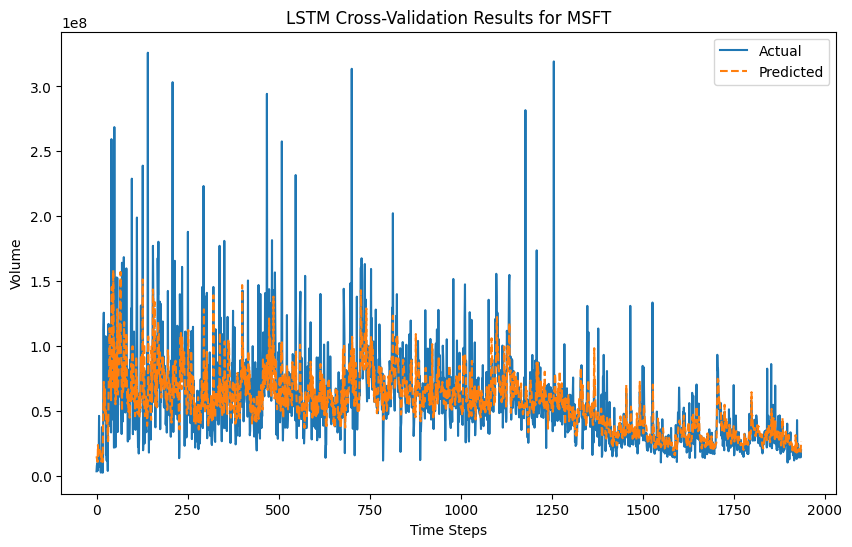

Cross-Validation Results for MSFT:
Fold MSE: [767708760268348.8, 1022142909131029.1, 532864018814911.9, 829647299802293.1, 716029354931244.4]
Average MSE: 773678468589565.5000
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


280/280 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - loss: 0.0022 - val_loss: 0.0010
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - loss: 0.0012 - val_loss: 9.4686e-04
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - loss: 0.0012 - val_loss: 9.0462e-04
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 8.4883e-04 - val_loss: 8.9112e-04
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - loss: 9.8142e-04 - val_loss: 7.5728e-04
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - loss: 0.0010 - val_loss: 7.6028e-04
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 9.1716e-04 - val_loss: 7.6253e-04
Epoch 10/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - loss: 9.4114e-04 - val_loss: 9.4276e-04
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


280/280 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0014 - val_loss: 8.6782e-04
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0011 - val_loss: 8.6437e-04
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - loss: 9.7763e-04 - val_loss: 9.8810e-04
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 9.7359e-04 - val_loss: 8.6798e-04
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0011 - val_loss: 8.1962e-04
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 9.9727e-04 - val_loss: 9.1834e-04
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0010 - val_loss: 8.4249e-04
Epoch 10/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0014 - val_loss: 7.9690e-04
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


280/280 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0012 - val_loss: 9.5217e-04
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0012 - val_loss: 9.6819e-04
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0013 - val_loss: 9.7383e-04
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 9.9631e-04 - val_loss: 8.3301e-04
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0011 - val_loss: 8.2299e-04
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 9.0206e-04 - val_loss: 8.9791e-04
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0010 - val_loss: 8.3759e-04
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 9.4661e-04 - val_loss: 9.1920e-04
Epoch 10/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - loss: 0.0011 - val_loss: 8.2549e-04
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


280/280 ━━━━━━━━━━━━━━━━━━━━ 27s 84ms/step - loss: 0.0025 - val_loss: 0.0013
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 43s 155ms/step - loss: 0.0017 - val_loss: 9.7793e-04
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - loss: 0.0012 - val_loss: 8.4232e-04
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0013 - val_loss: 8.4074e-04
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0010 - val_loss: 7.4135e-04
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - loss: 0.0013 - val_loss: 7.4633e-04
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1055s 4s/step - loss: 0.0011 - val_loss: 7.5289e-04
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 14s 51ms/step - loss: 0.0010 - val_loss: 8.6286e-04
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - loss: 0.0011 - val_loss: 6.8175e-04
Epoch 10/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 16s 55ms/step - loss: 0.0011 - val_loss: 7.1458e-04
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


280/280 ━━━━━━━━━━━━━━━━━━━━ 25s 69ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 12s 42ms/step - loss: 8.9468e-04 - val_loss: 0.0015
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - loss: 8.9215e-04 - val_loss: 0.0015
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 12s 42ms/step - loss: 8.8918e-04 - val_loss: 0.0015
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 8.8949e-04 - val_loss: 0.0015
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 9.0741e-04 - val_loss: 0.0014
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 8.0338e-04 - val_loss: 0.0015
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - loss: 9.0017e-04 - val_loss: 0.0014
Epoch 10/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 9.2371e-04 - val_loss: 0.0014
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


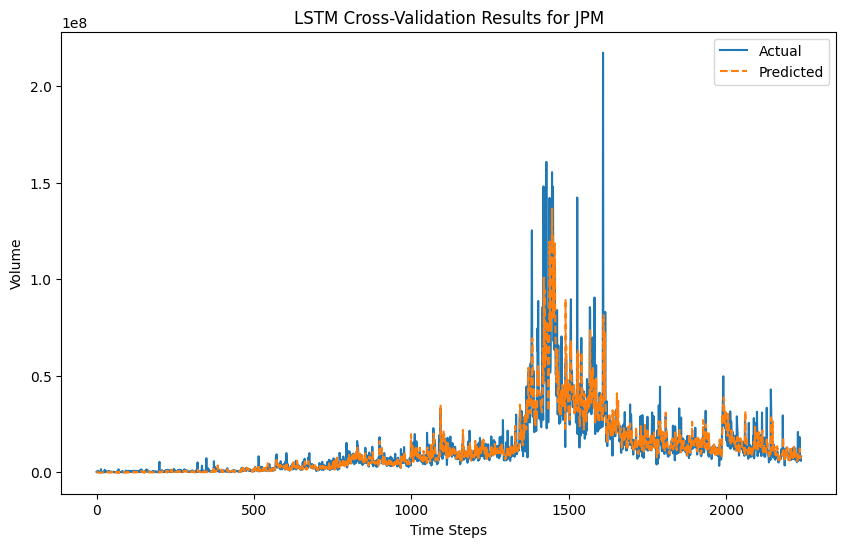

Cross-Validation Results for JPM:
Fold MSE: [35752747627625.75, 37623157149268.086, 38854680045023.09, 32186694356647.48, 64399490263365.734]
Average MSE: 41763353888386.0234
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


104/104 ━━━━━━━━━━━━━━━━━━━━ 23s 46ms/step - loss: 3.0490e-04 - val_loss: 2.0064e-04
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 3.3698e-04 - val_loss: 1.7113e-04
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 3.6691e-04 - val_loss: 1.9093e-04
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 3.0051e-04 - val_loss: 1.4214e-04
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 3.1453e-04 - val_loss: 1.4436e-04
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 2.0477e-04 - val_loss: 1.4386e-04
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 1.8351e-04 - val_loss: 1.6110e-04
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 2.4430e-04 - val_loss: 1.2780e-04
Epoch 9/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 2.9945e-04 - val_loss: 1.5469e-04
Epoch 10/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 1.7776e-04 - val_loss: 1.6890e-04
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


104/104 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 3.1383e-04 - val_loss: 4.6133e-04
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 2.0651e-04 - val_loss: 4.3756e-04
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 1.9951e-04 - val_loss: 4.8473e-04
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 1.5283e-04 - val_loss: 4.3501e-04
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 2.1650e-04 - val_loss: 4.2421e-04
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 1.5511e-04 - val_loss: 4.1212e-04
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 2.1912e-04 - val_loss: 4.0821e-04
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 1.3796e-04 - val_loss: 4.3070e-04
Epoch 9/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 1.8940e-04 - val_loss: 4.1230e-04
Epoch 10/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 1.9613e-04 - val_loss: 4.1265e-04
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


104/104 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 5.9388e-04 - val_loss: 1.9802e-04
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 2.2223e-04 - val_loss: 1.9567e-04
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 4.9082e-04 - val_loss: 2.0441e-04
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 2.8426e-04 - val_loss: 1.8217e-04
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 1.6174e-04 - val_loss: 2.0392e-04
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 2.7840e-04 - val_loss: 1.7955e-04
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 2.3491e-04 - val_loss: 1.7401e-04
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 2.2015e-04 - val_loss: 1.7330e-04
Epoch 9/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 3.6992e-04 - val_loss: 1.7133e-04
Epoch 10/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 1.9911e-04 - val_loss: 1.6608e-04
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


104/104 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 3.4789e-04 - val_loss: 2.1463e-04
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 1.8642e-04 - val_loss: 1.8914e-04
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 3.0127e-04 - val_loss: 1.8815e-04
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 3.0045e-04 - val_loss: 1.7432e-04
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 2.2030e-04 - val_loss: 1.9597e-04
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 2.2325e-04 - val_loss: 1.6689e-04
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 2.3981e-04 - val_loss: 2.1085e-04
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 2.0650e-04 - val_loss: 1.7293e-04
Epoch 9/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 2.3101e-04 - val_loss: 1.5781e-04
Epoch 10/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 1.7362e-04 - val_loss: 1.8576e-04
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


104/104 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 3.0073e-04 - val_loss: 2.0519e-04
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 2.7850e-04 - val_loss: 1.9913e-04
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 3.1643e-04 - val_loss: 2.1268e-04
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 2.3031e-04 - val_loss: 2.0910e-04
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 2.4545e-04 - val_loss: 1.8928e-04
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 2.1647e-04 - val_loss: 1.9260e-04
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 2.4741e-04 - val_loss: 1.9609e-04
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 2.0580e-04 - val_loss: 2.0521e-04
Epoch 9/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 1.8271e-04 - val_loss: 1.8197e-04
Epoch 10/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 2.5561e-04 - val_loss: 1.9268e-04
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


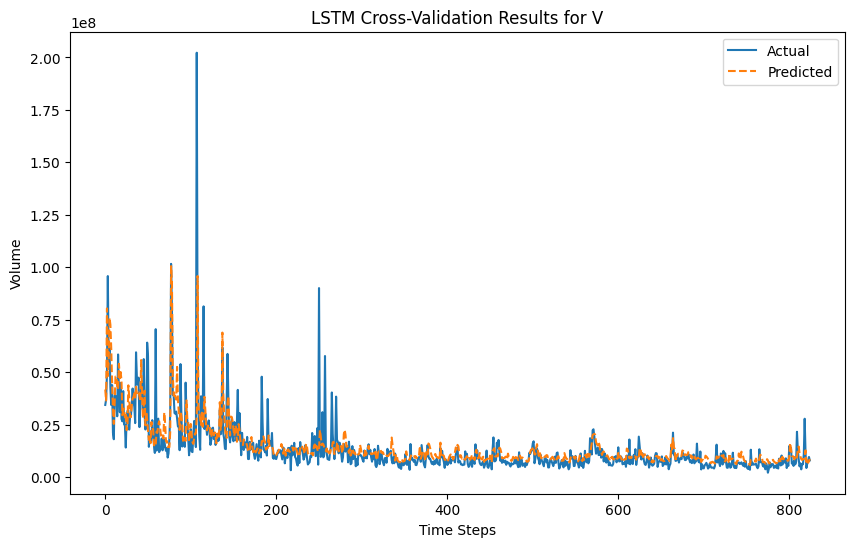

Cross-Validation Results for V:
Fold MSE: [63852758216430.48, 203952567498747.84, 82977080504499.3, 78848784932411.33, 90916898705712.88]
Average MSE: 104109617971560.3594
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


394/394 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - loss: 8.3975e-04 - val_loss: 4.4050e-04
Epoch 2/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 5.2326e-04 - val_loss: 4.0905e-04
Epoch 3/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 4.8614e-04 - val_loss: 4.5184e-04
Epoch 4/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 5.5732e-04 - val_loss: 4.1689e-04
Epoch 5/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - loss: 5.1778e-04 - val_loss: 4.0813e-04
Epoch 6/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 3.8361e-04 - val_loss: 5.7025e-04
Epoch 7/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - loss: 3.9394e-04 - val_loss: 3.8763e-04
Epoch 8/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - loss: 5.0998e-04 - val_loss: 4.1607e-04
Epoch 9/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 6.0391e-04 - val_loss: 3.9065e-04
Epoch 10/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - loss: 4.3292e-04 - val_loss: 4.1118e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
Epoch 1/10

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


395/395 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - loss: 9.5059e-04 - val_loss: 4.0375e-04
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 6.2675e-04 - val_loss: 3.5202e-04
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - loss: 7.0393e-04 - val_loss: 3.1994e-04
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 4.4601e-04 - val_loss: 3.1614e-04
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - loss: 5.6994e-04 - val_loss: 3.0865e-04
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - loss: 6.9487e-04 - val_loss: 3.0336e-04
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - loss: 5.3353e-04 - val_loss: 3.0123e-04
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 4.8803e-04 - val_loss: 2.9741e-04
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 7.2259e-04 - val_loss: 3.0566e-04
Epoch 10/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 6.3827e-04 - val_loss: 2.9311e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - loss: 5.9083e-04 - val_loss: 9.4135e-04
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 5.2549e-04 - val_loss: 8.2975e-04
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - loss: 4.5921e-04 - val_loss: 7.4070e-04
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - loss: 4.4175e-04 - val_loss: 7.0857e-04
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - loss: 3.6174e-04 - val_loss: 7.7094e-04
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - loss: 4.4615e-04 - val_loss: 7.4102e-04
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - loss: 3.7034e-04 - val_loss: 7.3127e-04
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - loss: 4.2342e-04 - val_loss: 8.1230e-04
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 3.5875e-04 - val_loss: 7.1598e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - loss: 6.9387e-04 - val_loss: 3.3759e-04
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - loss: 5.3306e-04 - val_loss: 4.2051e-04
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 5.4993e-04 - val_loss: 5.3241e-04
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - loss: 5.5244e-04 - val_loss: 3.5017e-04
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - loss: 4.9407e-04 - val_loss: 3.5860e-04
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - loss: 6.4713e-04 - val_loss: 3.3258e-04
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - loss: 4.4972e-04 - val_loss: 4.3029e-04
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - loss: 4.2779e-04 - val_loss: 4.0460e-04
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 4.4900e-04 - val_loss: 3.5152e-04
Epoch 10/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - loss: 4.5510e-04 - val_loss: 3.6465e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
Epoch 1/10

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - loss: 7.2304e-04 - val_loss: 0.0011
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - loss: 6.4660e-04 - val_loss: 5.3037e-04
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - loss: 5.2991e-04 - val_loss: 5.0410e-04
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 5.6680e-04 - val_loss: 5.1495e-04
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - loss: 4.8628e-04 - val_loss: 4.6702e-04
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - loss: 4.7328e-04 - val_loss: 4.7393e-04
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - loss: 4.1860e-04 - val_loss: 5.0003e-04
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - loss: 5.0576e-04 - val_loss: 4.6076e-04
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 4.7044e-04 - val_loss: 4.8262e-04
Epoch 10/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 4.6280e-04 - val_loss: 4.7990e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


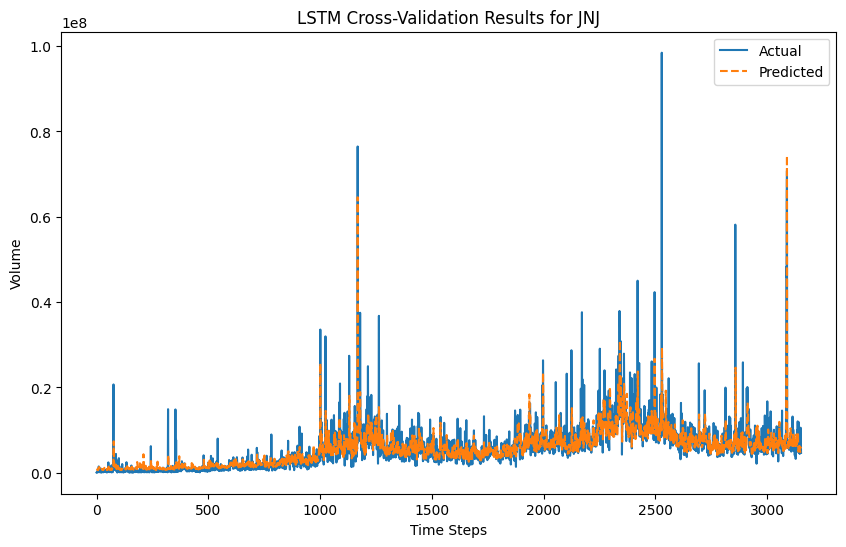

Cross-Validation Results for JNJ:
Fold MSE: [8875761810887.893, 6711422410656.497, 16224620158347.111, 7615294745780.832, 10550187446660.926]
Average MSE: 9995457314466.6504
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


328/328 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - loss: 0.0014 - val_loss: 8.5766e-04
Epoch 2/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - loss: 0.0011 - val_loss: 8.3183e-04
Epoch 3/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 0.0010 - val_loss: 8.9457e-04
Epoch 4/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 0.0011 - val_loss: 7.7844e-04
Epoch 5/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 9.9071e-04 - val_loss: 8.2377e-04
Epoch 6/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 0.0012 - val_loss: 8.0133e-04
Epoch 7/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 0.0011 - val_loss: 7.8013e-04
Epoch 8/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 9.9450e-04 - val_loss: 8.6499e-04
Epoch 9/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - loss: 0.0013 - val_loss: 7.8584e-04
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


328/328 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 2/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 3/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 9.5535e-04 - val_loss: 0.0010
Epoch 4/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - loss: 9.5048e-04 - val_loss: 0.0013
Epoch 5/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 9.8924e-04 - val_loss: 0.0010
Epoch 6/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - loss: 9.3213e-04 - val_loss: 9.5063e-04
Epoch 7/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 9.8845e-04 - val_loss: 9.6999e-04
Epoch 8/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 0.0012 - val_loss: 9.2743e-04
Epoch 9/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 0.0013 - val_loss: 9.5150e-04
Epoch 10/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 0.0010 - val_loss: 9.2108e-04
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


328/328 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 2/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 3/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 9.1380e-04 - val_loss: 0.0011
Epoch 4/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 9.5162e-04 - val_loss: 0.0011
Epoch 5/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 6/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 8.6764e-04 - val_loss: 0.0011
Epoch 7/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 8/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 9/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 10/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - loss: 9.2641e-04 - val_loss: 0.0011
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


328/328 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - loss: 0.0015 - val_loss: 9.4622e-04
Epoch 2/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - loss: 0.0012 - val_loss: 8.6674e-04
Epoch 3/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - loss: 0.0012 - val_loss: 9.8528e-04
Epoch 4/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - loss: 0.0013 - val_loss: 9.3697e-04
Epoch 5/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - loss: 9.8025e-04 - val_loss: 8.3652e-04
Epoch 6/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - loss: 0.0012 - val_loss: 8.1696e-04
Epoch 7/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - loss: 0.0010 - val_loss: 8.4954e-04
Epoch 8/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - loss: 9.2252e-04 - val_loss: 8.1871e-04
Epoch 9/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - loss: 9.9213e-04 - val_loss: 8.0326e-04
Epoch 10/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - loss: 9.2138e-04 - val_loss: 8.7122e-04
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


328/328 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 2/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 3/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - loss: 9.0204e-04 - val_loss: 0.0012
Epoch 4/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - loss: 8.7474e-04 - val_loss: 0.0013
Epoch 5/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 6/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step - loss: 8.6474e-04 - val_loss: 0.0012
Epoch 7/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 17s 52ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 8/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - loss: 9.0094e-04 - val_loss: 0.0012
Epoch 9/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - loss: 8.5154e-04 - val_loss: 0.0013
Epoch 10/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - loss: 0.0011 - val_loss: 0.0012
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step


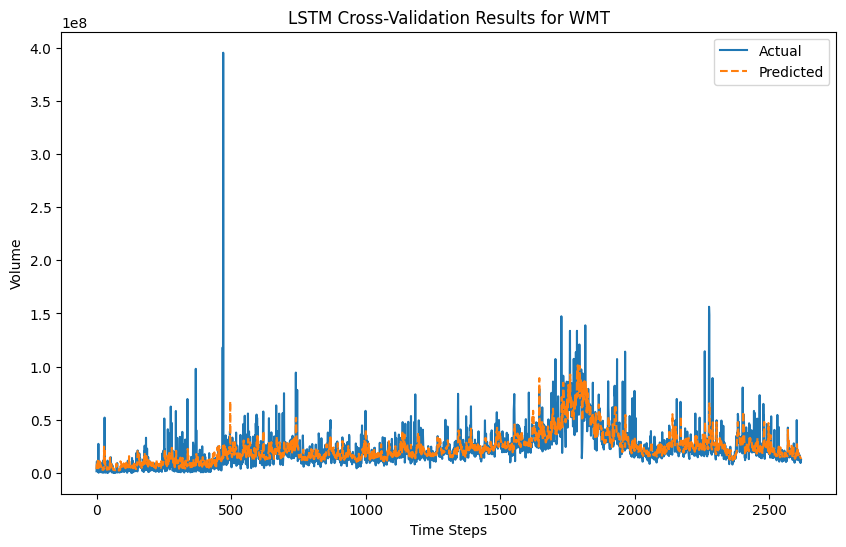

Cross-Validation Results for WMT:
Fold MSE: [121764715552352.4, 144076639097319.16, 174289524353473.6, 125647359003854.4, 184850689340104.84]
Average MSE: 150125785469420.8750


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - loss: 6.9912e-04 - val_loss: 7.1046e-04
Epoch 2/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - loss: 4.4667e-04 - val_loss: 6.9464e-04
Epoch 3/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - loss: 4.3519e-04 - val_loss: 6.8522e-04
Epoch 4/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 4.3274e-04 - val_loss: 7.8607e-04
Epoch 5/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 4.9468e-04 - val_loss: 6.8763e-04
Epoch 6/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - loss: 4.0547e-04 - val_loss: 6.9123e-04
Epoch 7/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - loss: 4.3110e-04 - val_loss: 6.7735e-04
Epoch 8/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 4.2415e-04 - val_loss: 6.7958e-04
Epoch 9/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - loss: 3.5810e-04 - val_loss: 6.9074e-04
Epoch 10/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - loss: 3.9464e-04 - val_loss: 6.7912e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


395/395 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - loss: 8.4539e-04 - val_loss: 4.7465e-04
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - loss: 4.3570e-04 - val_loss: 4.5109e-04
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 5.0946e-04 - val_loss: 4.1231e-04
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 6.4221e-04 - val_loss: 3.9183e-04
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 5.9991e-04 - val_loss: 6.0235e-04
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 6.5956e-04 - val_loss: 3.7587e-04
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - loss: 5.5769e-04 - val_loss: 3.6964e-04
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 5.9832e-04 - val_loss: 3.5675e-04
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 4.2469e-04 - val_loss: 3.8134e-04
Epoch 10/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 4.9564e-04 - val_loss: 3.4848e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
Epoch 1/10

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


395/395 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - loss: 6.4461e-04 - val_loss: 4.1182e-04
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 5.6739e-04 - val_loss: 4.0320e-04
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 5.2639e-04 - val_loss: 3.8902e-04
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 6.8791e-04 - val_loss: 5.0395e-04
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - loss: 6.1047e-04 - val_loss: 3.9397e-04
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 4.9422e-04 - val_loss: 4.3901e-04
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 4.1515e-04 - val_loss: 5.6403e-04
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - loss: 6.4251e-04 - val_loss: 3.8742e-04
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - loss: 4.1148e-04 - val_loss: 4.8402e-04
Epoch 10/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 4.9308e-04 - val_loss: 4.1303e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
Epoch 1/10

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - loss: 7.2493e-04 - val_loss: 5.1121e-04
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 6.5826e-04 - val_loss: 4.9049e-04
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 4.9569e-04 - val_loss: 5.0363e-04
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - loss: 3.9587e-04 - val_loss: 4.9673e-04
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 4.1936e-04 - val_loss: 5.3602e-04
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 6.7130e-04 - val_loss: 4.8450e-04
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - loss: 5.5051e-04 - val_loss: 4.5411e-04
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 5.1690e-04 - val_loss: 4.6514e-04
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 4.6524e-04 - val_loss: 4.6872e-04
Epoch 10/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - loss: 4.5832e-04 - val_loss: 4.8072e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
Epoch 1/10

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


395/395 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - loss: 7.1374e-04 - val_loss: 4.4650e-04
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 6.3671e-04 - val_loss: 3.6939e-04
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 4.9529e-04 - val_loss: 4.1649e-04
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 4.9824e-04 - val_loss: 3.3413e-04
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 4.4854e-04 - val_loss: 3.7857e-04
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - loss: 5.3837e-04 - val_loss: 3.6785e-04
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 4.5537e-04 - val_loss: 5.2723e-04
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - loss: 4.9898e-04 - val_loss: 3.5632e-04
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 4.1755e-04 - val_loss: 3.2272e-04
Epoch 10/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - loss: 4.6949e-04 - val_loss: 3.2738e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step


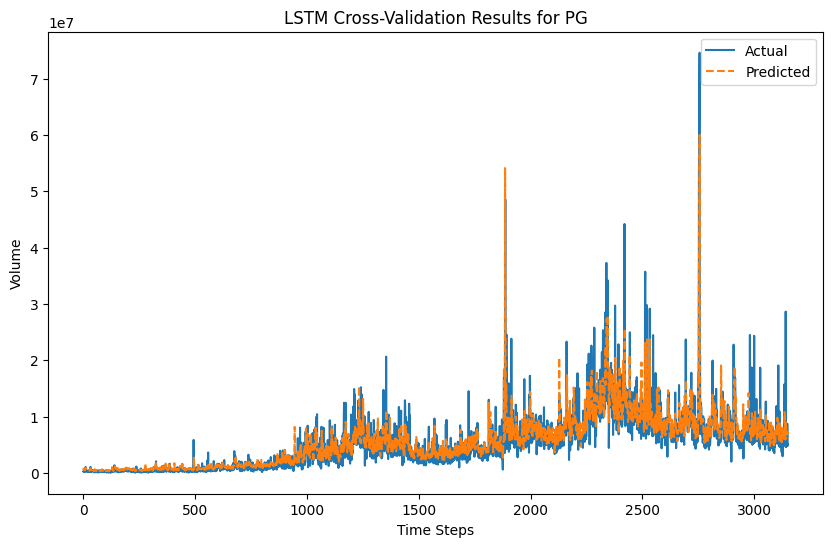

Cross-Validation Results for PG:
Fold MSE: [12764225635856.338, 6566827868782.14, 7300578928253.054, 8557360370785.873, 6081493520855.329]
Average MSE: 8254097264906.5469
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


251/251 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - loss: 0.0011 - val_loss: 9.3588e-04
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 9.8858e-04 - val_loss: 8.4661e-04
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 8.1112e-04 - val_loss: 8.1237e-04
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - loss: 8.2776e-04 - val_loss: 7.9516e-04
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 0.0010 - val_loss: 7.7713e-04
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 9.0185e-04 - val_loss: 7.9199e-04
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 9.0940e-04 - val_loss: 8.0587e-04
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 6.4753e-04 - val_loss: 8.8275e-04
Epoch 9/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 7.9001e-04 - val_loss: 8.1040e-04
Epoch 10/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 8.4805e-04 - val_loss: 7.7370e-04
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


251/251 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 8.3012e-04 - val_loss: 0.0012
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 8.6770e-04 - val_loss: 0.0012
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 8.5907e-04 - val_loss: 0.0012
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 8.5532e-04 - val_loss: 0.0012
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 6.8012e-04 - val_loss: 0.0012
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 8.1826e-04 - val_loss: 0.0011
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 6.6433e-04 - val_loss: 0.0012
Epoch 9/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 7.0931e-04 - val_loss: 0.0012
Epoch 10/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 6.2655e-04 - val_loss: 0.0012
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


251/251 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - loss: 0.0012 - val_loss: 7.5093e-04
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - loss: 9.9554e-04 - val_loss: 7.5092e-04
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - loss: 9.5434e-04 - val_loss: 6.9202e-04
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 7.6607e-04 - val_loss: 7.8409e-04
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 9.0009e-04 - val_loss: 6.9338e-04
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 9.9985e-04 - val_loss: 6.8603e-04
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 8.7742e-04 - val_loss: 7.0154e-04
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 7.7888e-04 - val_loss: 6.9739e-04
Epoch 9/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 7.5523e-04 - val_loss: 6.7563e-04
Epoch 10/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 8.5319e-04 - val_loss: 7.1888e-04
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


251/251 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - loss: 0.0012 - val_loss: 7.6017e-04
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 9.8713e-04 - val_loss: 7.1120e-04
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0011 - val_loss: 7.1055e-04
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 8.5498e-04 - val_loss: 8.1941e-04
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 7.3243e-04 - val_loss: 7.5572e-04
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 8.4880e-04 - val_loss: 6.8096e-04
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 8.8810e-04 - val_loss: 6.8595e-04
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 8.7450e-04 - val_loss: 8.2330e-04
Epoch 9/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 9.7273e-04 - val_loss: 6.7819e-04
Epoch 10/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 8.1022e-04 - val_loss: 6.6493e-04
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


251/251 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 9.3721e-04 - val_loss: 8.3697e-04
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 8.5726e-04 - val_loss: 7.9282e-04
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0010 - val_loss: 7.6908e-04
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 8.7136e-04 - val_loss: 7.5622e-04
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 7.5399e-04 - val_loss: 7.2852e-04
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 0.0014 - val_loss: 7.8433e-04
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 7.0307e-04 - val_loss: 7.2982e-04
Epoch 9/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 7.2542e-04 - val_loss: 7.1748e-04
Epoch 10/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 8.8882e-04 - val_loss: 7.3380e-04
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


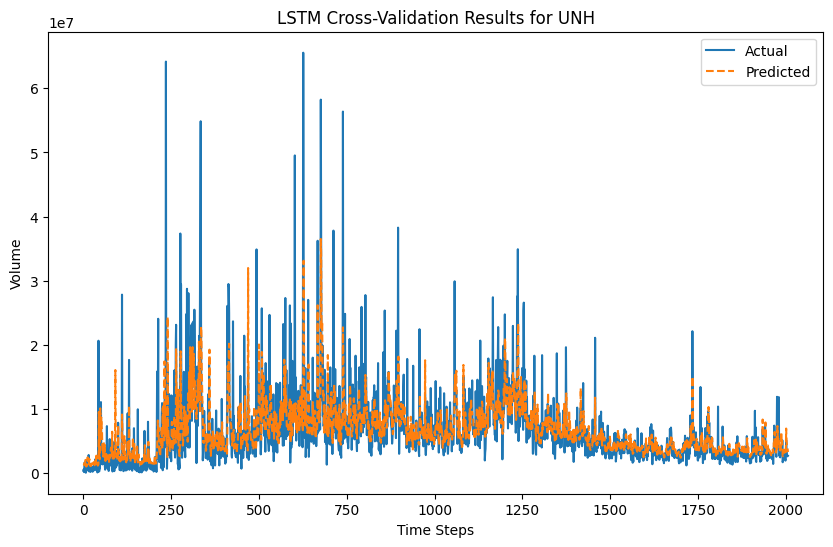

Cross-Validation Results for UNH:
Fold MSE: [20260330323194.652, 29979124400010.062, 17692116237058.703, 17411925972197.102, 18788008565238.133]
Average MSE: 20826301099539.7305
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


271/271 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 2/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 3/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 4/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 5/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 6/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.0010 - val_loss: 0.0015
Epoch 7/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.0010 - val_loss: 0.0014
Epoch 8/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 0.0010 - val_loss: 0.0015
Epoch 9/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 10/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - loss: 0.0012 - val_loss: 0.0015
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


271/271 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 2/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 3/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 4/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 5/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.0013 - val_loss: 9.8678e-04
Epoch 6/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 7/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 8/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 9/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 0.0014 - val_loss: 9.7323e-04
Epoch 10/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 0.0012 - val_loss: 9.8491e-04
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


271/271 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 2/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 3/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 4/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 5/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 6/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 7/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 8/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 9/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 10/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 0.0019 - val_loss: 0.0011
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


271/271 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 2/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 3/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - loss: 0.0013 - val_loss: 9.8640e-04
Epoch 4/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.0012 - val_loss: 9.1978e-04
Epoch 5/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 6/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.0011 - val_loss: 9.5982e-04
Epoch 7/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 0.0013 - val_loss: 9.5219e-04
Epoch 8/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.0014 - val_loss: 8.9482e-04
Epoch 9/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 0.0012 - val_loss: 9.1819e-04
Epoch 10/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 0.0011 - val_loss: 9.3063e-04
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


271/271 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 2/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 3/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 4/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 5/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 6/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 7/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 8/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 9/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 10/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.0011 - val_loss: 0.0013
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


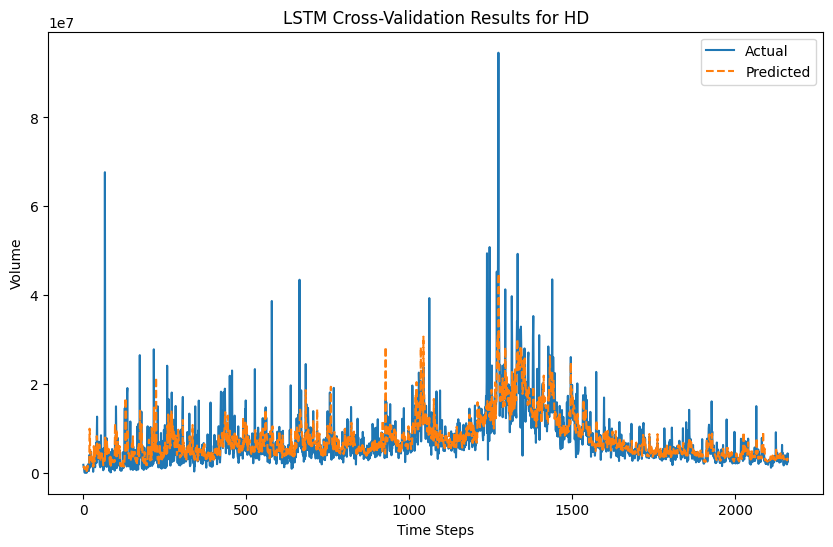

Cross-Validation Results for HD:
Fold MSE: [19753393928068.586, 13343283208111.824, 14993414716685.607, 12268214493736.762, 16327076353293.506]
Average MSE: 15337076539979.2559
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


280/280 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - loss: 0.0025 - val_loss: 0.0021
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 10/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - loss: 0.0023 - val_loss: 0.0021
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


280/280 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - loss: 0.0033 - val_loss: 0.0023
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0022 - val_loss: 0.0023
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0022 - val_loss: 0.0023
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0018 - val_loss: 0.0023
Epoch 10/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 0.0021 - val_loss: 0.0020
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


280/280 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 0.0030 - val_loss: 0.0024
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - loss: 0.0022 - val_loss: 0.0026
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0020 - val_loss: 0.0022
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - loss: 0.0019 - val_loss: 0.0022
Epoch 10/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0024 - val_loss: 0.0021
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


280/280 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - loss: 0.0029 - val_loss: 0.0017
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - loss: 0.0023 - val_loss: 0.0016
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - loss: 0.0022 - val_loss: 0.0015
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - loss: 0.0022 - val_loss: 0.0015
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - loss: 0.0025 - val_loss: 0.0015
Epoch 10/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - loss: 0.0020 - val_loss: 0.0015
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 0.0021 - val_loss: 0.0023
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 0.0020 - val_loss: 0.0024
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0019 - val_loss: 0.0021
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


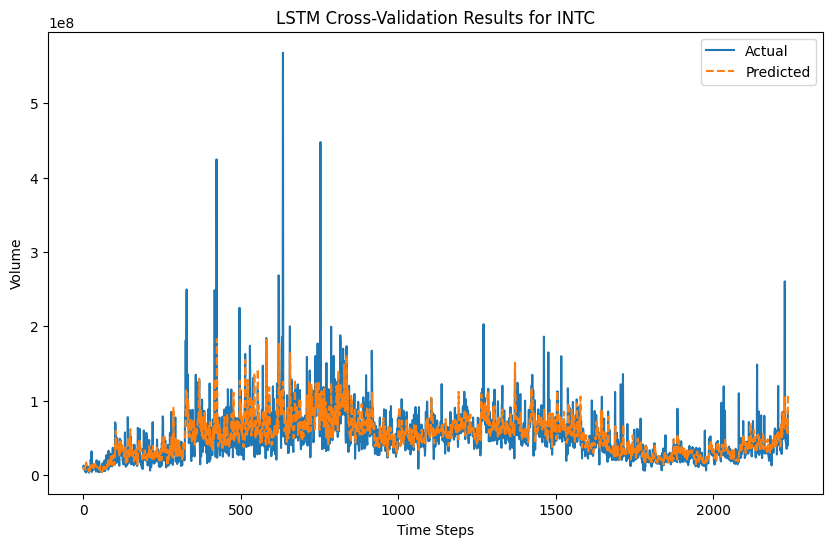

Cross-Validation Results for INTC:
Fold MSE: [625910712142046.0, 647798663024835.6, 690901033592352.9, 480891396348592.6, 655111233193821.6]
Average MSE: 620122607660329.7500
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


394/394 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 2/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 3/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 4/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 5/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 6/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 7/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 8/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 9/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 10/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 0.0014 - val_loss: 0.0014
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


395/395 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0014 - val_loss: 0.0014
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 10/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0014 - val_loss: 0.0013
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 10/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 0.0014 - val_loss: 0.0016
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 10/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 0.0015 - val_loss: 0.0014
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


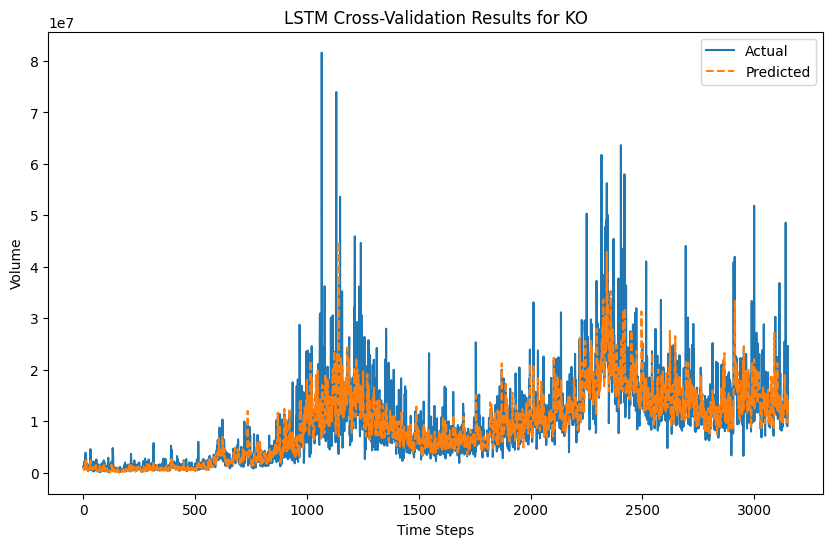

Cross-Validation Results for KO:
Fold MSE: [21811006825718.984, 21026984651519.523, 20132916304294.53, 22952158634941.176, 21277197800609.027]
Average MSE: 21440052843416.6484
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


394/394 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - loss: 8.5855e-04 - val_loss: 4.3989e-04
Epoch 2/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 5.2170e-04 - val_loss: 5.0607e-04
Epoch 3/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 5.0131e-04 - val_loss: 4.3316e-04
Epoch 4/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 4.8859e-04 - val_loss: 4.5100e-04
Epoch 5/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 5.8773e-04 - val_loss: 4.1237e-04
Epoch 6/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 4.8529e-04 - val_loss: 3.7623e-04
Epoch 7/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 6.2609e-04 - val_loss: 3.7997e-04
Epoch 8/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 4.6544e-04 - val_loss: 4.1169e-04
Epoch 9/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 5.7668e-04 - val_loss: 3.8864e-04
Epoch 10/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - loss: 5.9228e-04 - val_loss: 3.7221e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
Epoch 1/10

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - loss: 6.7870e-04 - val_loss: 8.3775e-04
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 5.8626e-04 - val_loss: 7.3099e-04
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 5.7811e-04 - val_loss: 7.2152e-04
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 4.9199e-04 - val_loss: 6.9778e-04
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 4.8149e-04 - val_loss: 6.9220e-04
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 4.2230e-04 - val_loss: 6.8509e-04
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - loss: 5.2163e-04 - val_loss: 7.3317e-04
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 4.8049e-04 - val_loss: 7.7740e-04
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 4.6169e-04 - val_loss: 7.8079e-04
Epoch 10/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - loss: 4.2146e-04 - val_loss: 7.4245e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
Epoch 1/10

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


395/395 ━━━━━━━━━━━━━━━━━━━━ 22s 44ms/step - loss: 5.9691e-04 - val_loss: 7.2528e-04
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - loss: 5.7408e-04 - val_loss: 7.8623e-04
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 4.9958e-04 - val_loss: 6.5983e-04
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - loss: 4.7688e-04 - val_loss: 6.8600e-04
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - loss: 3.8363e-04 - val_loss: 6.7867e-04
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 4.9525e-04 - val_loss: 6.4892e-04
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 5.3830e-04 - val_loss: 6.8123e-04
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 4.8234e-04 - val_loss: 6.6604e-04
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - loss: 3.8715e-04 - val_loss: 6.7310e-04
Epoch 10/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - loss: 4.3087e-04 - val_loss: 6.5008e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
Epoch 1/10

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


395/395 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - loss: 7.4270e-04 - val_loss: 3.8684e-04
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 6.2367e-04 - val_loss: 3.0921e-04
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - loss: 5.0517e-04 - val_loss: 3.6259e-04
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 5.4007e-04 - val_loss: 2.6609e-04
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 6.3672e-04 - val_loss: 2.7404e-04
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 4.7441e-04 - val_loss: 3.0363e-04
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 5.4537e-04 - val_loss: 2.7392e-04
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - loss: 6.8729e-04 - val_loss: 2.6370e-04
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 4.3247e-04 - val_loss: 2.5602e-04
Epoch 10/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 4.7705e-04 - val_loss: 2.6760e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
Epoch 1/10

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


395/395 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - loss: 8.0150e-04 - val_loss: 4.6468e-04
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 6.8028e-04 - val_loss: 4.0068e-04
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 7.0083e-04 - val_loss: 4.3506e-04
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 5.8103e-04 - val_loss: 4.0584e-04
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 4.5062e-04 - val_loss: 4.1926e-04
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 5.8009e-04 - val_loss: 4.5026e-04
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 4.6952e-04 - val_loss: 4.8220e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


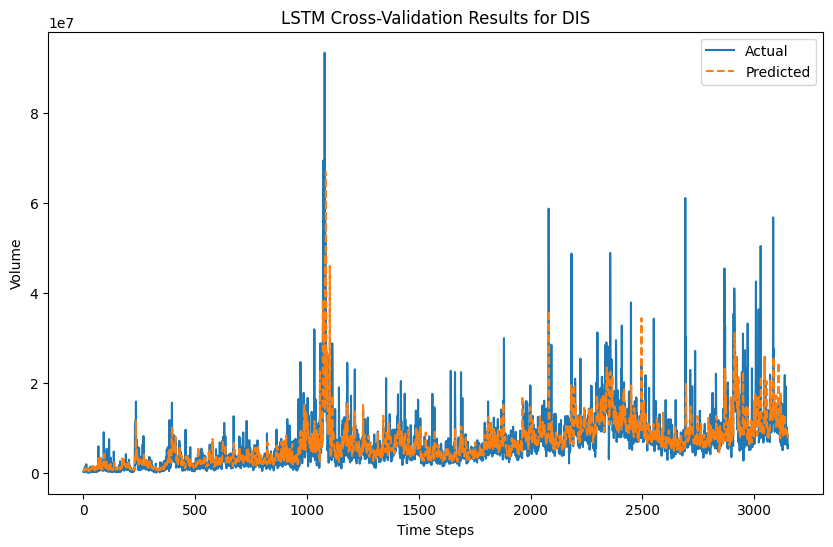

Cross-Validation Results for DIS:
Fold MSE: [15768832607658.898, 29023943038590.64, 27491647894544.81, 10846390557587.555, 16974889699586.422]
Average MSE: 20021140759593.6641
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


394/394 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - loss: 0.0011 - val_loss: 7.4547e-04
Epoch 2/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 7.2616e-04 - val_loss: 6.9233e-04
Epoch 3/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 7.1652e-04 - val_loss: 6.5041e-04
Epoch 4/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 7.5856e-04 - val_loss: 6.5826e-04
Epoch 5/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 6.9947e-04 - val_loss: 6.4276e-04
Epoch 6/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 8.1856e-04 - val_loss: 6.6711e-04
Epoch 7/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 6.3373e-04 - val_loss: 6.3873e-04
Epoch 8/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 9.3282e-04 - val_loss: 6.5616e-04
Epoch 9/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 6.9102e-04 - val_loss: 6.8614e-04
Epoch 10/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 7.2776e-04 - val_loss: 6.6923e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - loss: 9.0798e-04 - val_loss: 7.7752e-04
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 7.4778e-04 - val_loss: 7.4120e-04
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 6.9610e-04 - val_loss: 7.0474e-04
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 8.2532e-04 - val_loss: 7.0032e-04
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 6.3544e-04 - val_loss: 6.7790e-04
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 7.4693e-04 - val_loss: 7.1030e-04
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 6.7795e-04 - val_loss: 7.0920e-04
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 7.0089e-04 - val_loss: 6.8574e-04
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 7.1115e-04 - val_loss: 7.0678e-04
Epoch 10/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 6.3201e-04 - val_loss: 6.7197e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
Epoch 1/10

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - loss: 0.0010 - val_loss: 5.5846e-04
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 9.5376e-04 - val_loss: 5.0770e-04
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 7.1203e-04 - val_loss: 0.0016
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 9.4222e-04 - val_loss: 4.8059e-04
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 7.5791e-04 - val_loss: 5.2308e-04
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 8.0618e-04 - val_loss: 4.5559e-04
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 6.6549e-04 - val_loss: 4.5570e-04
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 8.7802e-04 - val_loss: 4.6073e-04
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 7.6020e-04 - val_loss: 4.6750e-04
Epoch 10/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 8.5465e-04 - val_loss: 4.6195e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - loss: 0.0011 - val_loss: 7.6146e-04
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 7.3988e-04 - val_loss: 8.2891e-04
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 6.5755e-04 - val_loss: 6.9803e-04
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 7.3877e-04 - val_loss: 7.0181e-04
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 6.7620e-04 - val_loss: 7.0817e-04
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 6.0958e-04 - val_loss: 6.7272e-04
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 6.9103e-04 - val_loss: 6.8250e-04
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 7.0737e-04 - val_loss: 6.7961e-04
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 7.1708e-04 - val_loss: 7.0834e-04
Epoch 10/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 6.0899e-04 - val_loss: 6.8616e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - loss: 9.4181e-04 - val_loss: 0.0011
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 7.6841e-04 - val_loss: 0.0011
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 8.3132e-04 - val_loss: 9.8049e-04
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 6.9811e-04 - val_loss: 0.0010
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 6.0804e-04 - val_loss: 9.8912e-04
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 7.1432e-04 - val_loss: 0.0010
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 6.0970e-04 - val_loss: 0.0010
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 6.5497e-04 - val_loss: 9.9802e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


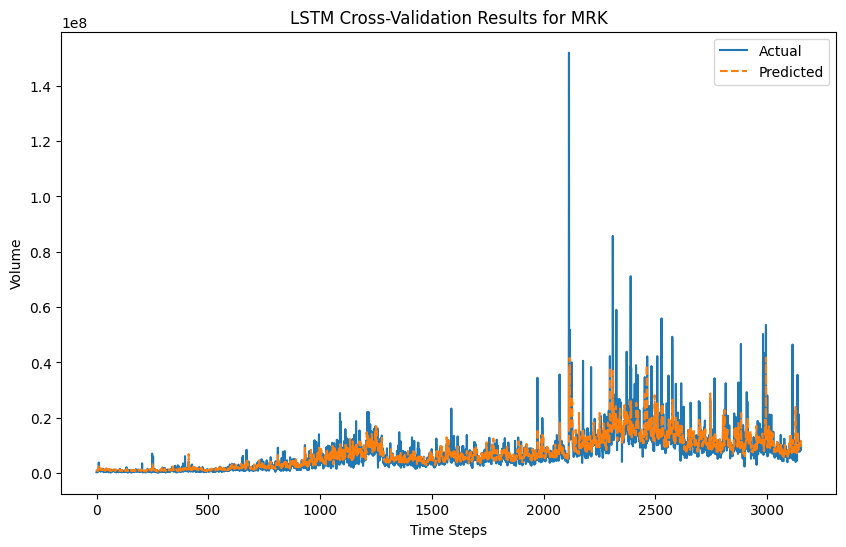

Cross-Validation Results for MRK:
Fold MSE: [14752508401218.791, 15520444863141.822, 10522730620619.43, 15537671319780.629, 22646258353720.953]
Average MSE: 15795922711696.3242
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


394/394 ━━━━━━━━━━━━━━━━━━━━ 37s 36ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 2/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 3/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 4/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 5/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 6/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 7/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 8/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 9/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 0.0013 - val_loss: 0.0015
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


395/395 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - loss: 0.0023 - val_loss: 0.0013
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - loss: 0.0015 - val_loss: 9.9759e-04
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - loss: 0.0014 - val_loss: 9.7892e-04
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - loss: 0.0015 - val_loss: 9.8796e-04
Epoch 10/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0013 - val_loss: 9.5621e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


395/395 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0011 - val_loss: 0.0019
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 10/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0012 - val_loss: 0.0018
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


395/395 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - loss: 0.0023 - val_loss: 0.0011
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0016 - val_loss: 9.8383e-04
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0016 - val_loss: 9.9972e-04
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 0.0016 - val_loss: 9.8672e-04
Epoch 10/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - loss: 0.0014 - val_loss: 9.8896e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


395/395 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 10/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 0.0013 - val_loss: 0.0014
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


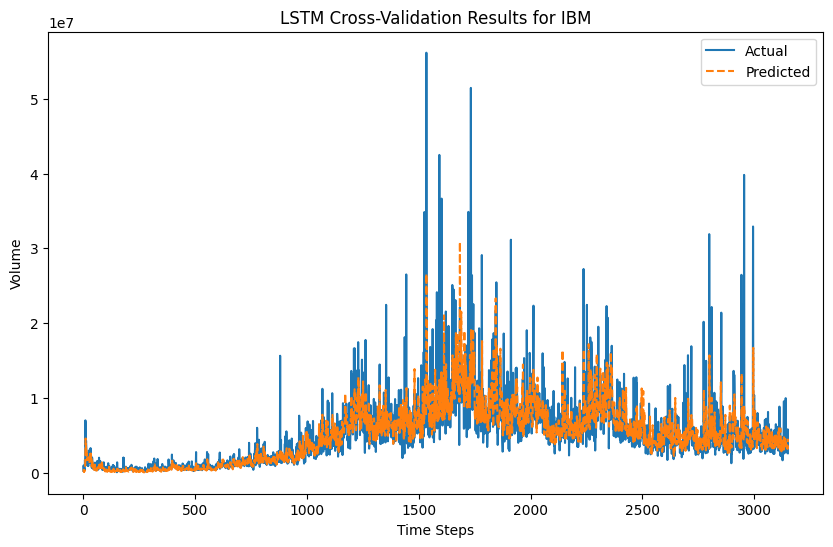

Cross-Validation Results for IBM:
Fold MSE: [7516890017405.509, 5045410567434.769, 8781249377484.891, 5191125537096.135, 7373269398266.313]
Average MSE: 6781588979537.5234


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - loss: 0.0013 - val_loss: 7.8575e-04
Epoch 2/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - loss: 8.7965e-04 - val_loss: 8.7234e-04
Epoch 3/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - loss: 8.4163e-04 - val_loss: 7.3196e-04
Epoch 4/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 9.3389e-04 - val_loss: 7.3777e-04
Epoch 5/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - loss: 9.9593e-04 - val_loss: 7.2978e-04
Epoch 6/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - loss: 8.7816e-04 - val_loss: 6.8874e-04
Epoch 7/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - loss: 7.5532e-04 - val_loss: 7.0966e-04
Epoch 8/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 7.5307e-04 - val_loss: 6.8693e-04
Epoch 9/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - loss: 7.4350e-04 - val_loss: 7.2161e-04
Epoch 10/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 7.6110e-04 - val_loss: 8.3867e-04
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Epo

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


308/308 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 2/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 7.8605e-04 - val_loss: 0.0010
Epoch 3/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - loss: 7.9579e-04 - val_loss: 9.4626e-04
Epoch 4/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - loss: 7.8501e-04 - val_loss: 9.7583e-04
Epoch 5/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - loss: 7.9189e-04 - val_loss: 9.3561e-04
Epoch 6/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 7.5463e-04 - val_loss: 8.9664e-04
Epoch 7/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - loss: 6.9924e-04 - val_loss: 9.5652e-04
Epoch 8/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - loss: 7.3701e-04 - val_loss: 9.2876e-04
Epoch 9/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - loss: 6.9164e-04 - val_loss: 8.8959e-04
Epoch 10/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 7.6735e-04 - val_loss: 9.3759e-04
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


308/308 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - loss: 0.0012 - val_loss: 8.2520e-04
Epoch 2/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 8.2375e-04 - val_loss: 8.1129e-04
Epoch 3/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 9.2249e-04 - val_loss: 7.1357e-04
Epoch 4/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 8.5395e-04 - val_loss: 7.0308e-04
Epoch 5/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 7.4845e-04 - val_loss: 7.0726e-04
Epoch 6/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - loss: 8.2960e-04 - val_loss: 7.4278e-04
Epoch 7/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - loss: 7.5749e-04 - val_loss: 6.6051e-04
Epoch 8/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - loss: 8.1373e-04 - val_loss: 6.9783e-04
Epoch 9/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 8.8949e-04 - val_loss: 6.5010e-04
Epoch 10/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - loss: 7.8288e-04 - val_loss: 6.5675e-04
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


308/308 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - loss: 0.0013 - val_loss: 7.1119e-04
Epoch 2/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 8.6450e-04 - val_loss: 0.0010
Epoch 3/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 9.2363e-04 - val_loss: 6.7688e-04
Epoch 4/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 8.5636e-04 - val_loss: 7.0678e-04
Epoch 5/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 7.2351e-04 - val_loss: 6.4455e-04
Epoch 6/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - loss: 7.9326e-04 - val_loss: 6.9844e-04
Epoch 7/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - loss: 7.7140e-04 - val_loss: 6.8486e-04
Epoch 8/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - loss: 7.6781e-04 - val_loss: 6.3697e-04
Epoch 9/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 7.7142e-04 - val_loss: 7.1641e-04
Epoch 10/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - loss: 7.3181e-04 - val_loss: 6.3205e-04
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


308/308 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 2/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 0.0011 - val_loss: 7.6676e-04
Epoch 3/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - loss: 7.9296e-04 - val_loss: 9.1453e-04
Epoch 4/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 9.0141e-04 - val_loss: 7.1297e-04
Epoch 5/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - loss: 7.9877e-04 - val_loss: 7.6508e-04
Epoch 6/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - loss: 8.1103e-04 - val_loss: 7.7702e-04
Epoch 7/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - loss: 7.9066e-04 - val_loss: 7.2669e-04
Epoch 8/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - loss: 7.1581e-04 - val_loss: 7.5481e-04
Epoch 9/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - loss: 7.7743e-04 - val_loss: 7.3606e-04
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


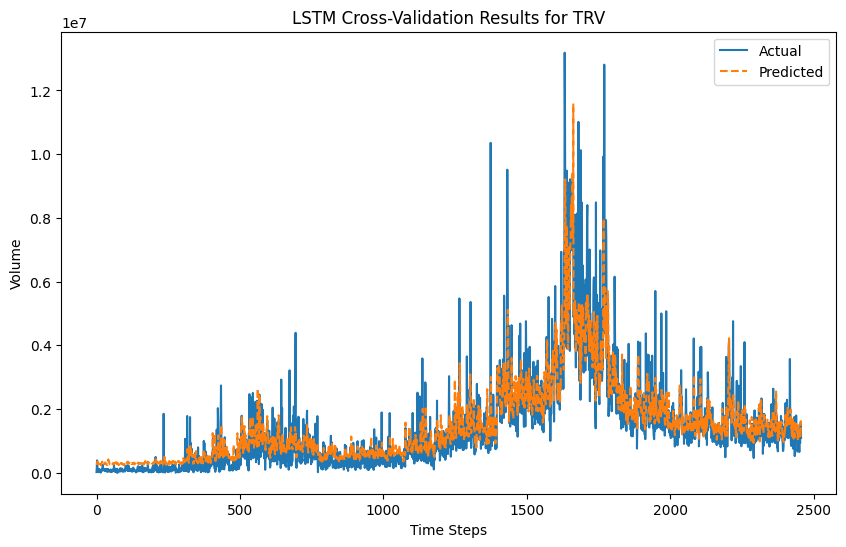

Cross-Validation Results for TRV:
Fold MSE: [531661345901.37274, 688507729331.4329, 503153482376.205, 489185111516.1423, 551814393111.3108]
Average MSE: 552864412447.2927
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


276/276 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - loss: 0.0035 - val_loss: 0.0027
Epoch 2/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 0.0031 - val_loss: 0.0026
Epoch 3/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0027 - val_loss: 0.0025
Epoch 4/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.0027 - val_loss: 0.0024
Epoch 5/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 6/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0029 - val_loss: 0.0025
Epoch 7/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 0.0028 - val_loss: 0.0025
Epoch 8/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 0.0027 - val_loss: 0.0025
Epoch 9/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 0.0028 - val_loss: 0.0024
Epoch 10/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.0029 - val_loss: 0.0024
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


276/276 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - loss: 0.0036 - val_loss: 0.0021
Epoch 2/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0033 - val_loss: 0.0020
Epoch 3/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 0.0027 - val_loss: 0.0021
Epoch 4/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 0.0032 - val_loss: 0.0021
Epoch 5/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 0.0030 - val_loss: 0.0019
Epoch 6/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - loss: 0.0030 - val_loss: 0.0020
Epoch 7/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - loss: 0.0028 - val_loss: 0.0019
Epoch 8/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - loss: 0.0026 - val_loss: 0.0018
Epoch 9/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - loss: 0.0030 - val_loss: 0.0021
Epoch 10/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - loss: 0.0030 - val_loss: 0.0019
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


276/276 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 2/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 0.0030 - val_loss: 0.0031
Epoch 3/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 0.0026 - val_loss: 0.0030
Epoch 4/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 0.0028 - val_loss: 0.0031
Epoch 5/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 6/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.0028 - val_loss: 0.0029
Epoch 7/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0025 - val_loss: 0.0029
Epoch 8/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 0.0028 - val_loss: 0.0031
Epoch 9/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.0027 - val_loss: 0.0028
Epoch 10/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0027 - val_loss: 0.0029
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


276/276 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 2/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0031 - val_loss: 0.0033
Epoch 3/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 0.0027 - val_loss: 0.0031
Epoch 4/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0028 - val_loss: 0.0030
Epoch 5/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0026 - val_loss: 0.0032
Epoch 6/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.0024 - val_loss: 0.0030
Epoch 7/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0027 - val_loss: 0.0031
Epoch 8/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0024 - val_loss: 0.0031
Epoch 9/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0025 - val_loss: 0.0030
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


276/276 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - loss: 0.0037 - val_loss: 0.0033
Epoch 2/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 3/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 0.0027 - val_loss: 0.0032
Epoch 4/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 5/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 6/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 0.0025 - val_loss: 0.0031
Epoch 7/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 0.0027 - val_loss: 0.0033
Epoch 8/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 0.0026 - val_loss: 0.0030
Epoch 9/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.0026 - val_loss: 0.0030
Epoch 10/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - loss: 0.0024 - val_loss: 0.0030
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


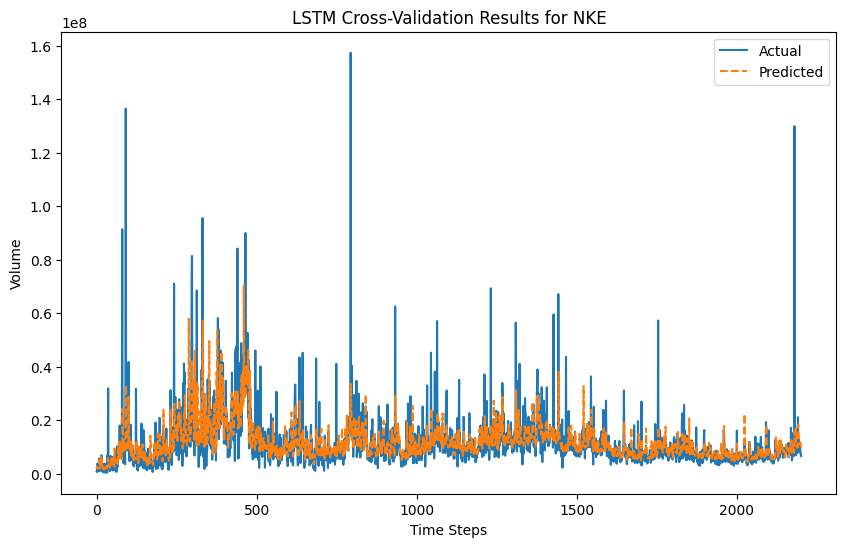

Cross-Validation Results for NKE:
Fold MSE: [59511633679882.984, 45668756207528.95, 70543905611449.03, 74691374360237.53, 73741263209247.03]
Average MSE: 64831386613669.1016
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


366/366 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - loss: 9.2491e-04 - val_loss: 5.8054e-04
Epoch 2/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - loss: 7.6077e-04 - val_loss: 6.5818e-04
Epoch 3/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - loss: 7.1956e-04 - val_loss: 5.1968e-04
Epoch 4/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - loss: 7.3257e-04 - val_loss: 5.2778e-04
Epoch 5/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - loss: 7.4776e-04 - val_loss: 5.3983e-04
Epoch 6/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - loss: 7.1428e-04 - val_loss: 6.4714e-04
Epoch 7/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - loss: 6.9643e-04 - val_loss: 5.4703e-04
Epoch 8/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - loss: 7.3329e-04 - val_loss: 5.4131e-04
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


366/366 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - loss: 8.4737e-04 - val_loss: 0.0010
Epoch 2/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - loss: 6.5601e-04 - val_loss: 8.6291e-04
Epoch 3/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - loss: 6.3741e-04 - val_loss: 8.6322e-04
Epoch 4/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - loss: 6.9468e-04 - val_loss: 8.5678e-04
Epoch 5/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - loss: 6.1128e-04 - val_loss: 8.3116e-04
Epoch 6/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - loss: 6.7264e-04 - val_loss: 8.2836e-04
Epoch 7/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - loss: 5.9926e-04 - val_loss: 8.1717e-04
Epoch 8/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - loss: 6.4485e-04 - val_loss: 8.1460e-04
Epoch 9/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - loss: 5.7716e-04 - val_loss: 8.0434e-04
Epoch 10/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - loss: 6.0931e-04 - val_loss: 7.9554e-04
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


366/366 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - loss: 8.7847e-04 - val_loss: 8.7482e-04
Epoch 2/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - loss: 9.9900e-04 - val_loss: 8.4164e-04
Epoch 3/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - loss: 6.2318e-04 - val_loss: 8.6287e-04
Epoch 4/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - loss: 6.0523e-04 - val_loss: 9.3585e-04
Epoch 5/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - loss: 5.8590e-04 - val_loss: 8.1491e-04
Epoch 6/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - loss: 6.9846e-04 - val_loss: 7.8365e-04
Epoch 7/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - loss: 5.8843e-04 - val_loss: 8.2515e-04
Epoch 8/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - loss: 6.0594e-04 - val_loss: 8.2869e-04
Epoch 9/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - loss: 6.4373e-04 - val_loss: 7.8512e-04
Epoch 10/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - loss: 7.3555e-04 - val_loss: 8.3645e-04
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
Epoch 1/10

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


366/366 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - loss: 9.8477e-04 - val_loss: 7.2550e-04
Epoch 2/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - loss: 6.6930e-04 - val_loss: 7.7872e-04
Epoch 3/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - loss: 7.7491e-04 - val_loss: 6.4976e-04
Epoch 4/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - loss: 7.4720e-04 - val_loss: 6.2828e-04
Epoch 5/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - loss: 6.6848e-04 - val_loss: 6.6823e-04
Epoch 6/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - loss: 6.5519e-04 - val_loss: 6.2094e-04
Epoch 7/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - loss: 7.0699e-04 - val_loss: 6.1868e-04
Epoch 8/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - loss: 6.6386e-04 - val_loss: 6.1929e-04
Epoch 9/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - loss: 7.6231e-04 - val_loss: 6.2334e-04
Epoch 10/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - loss: 6.1004e-04 - val_loss: 6.6021e-04
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - loss: 9.0302e-04 - val_loss: 5.6517e-04
Epoch 2/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - loss: 7.6210e-04 - val_loss: 5.2806e-04
Epoch 3/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - loss: 7.9538e-04 - val_loss: 4.7420e-04
Epoch 4/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - loss: 7.4333e-04 - val_loss: 4.6381e-04
Epoch 5/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - loss: 6.8225e-04 - val_loss: 4.7034e-04
Epoch 6/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - loss: 7.3270e-04 - val_loss: 4.9854e-04
Epoch 7/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - loss: 7.7774e-04 - val_loss: 4.6606e-04
Epoch 8/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - loss: 7.0097e-04 - val_loss: 4.6705e-04
Epoch 9/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - loss: 6.8284e-04 - val_loss: 4.5988e-04
Epoch 10/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - loss: 7.9441e-04 - val_loss: 4.6034e-04
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step

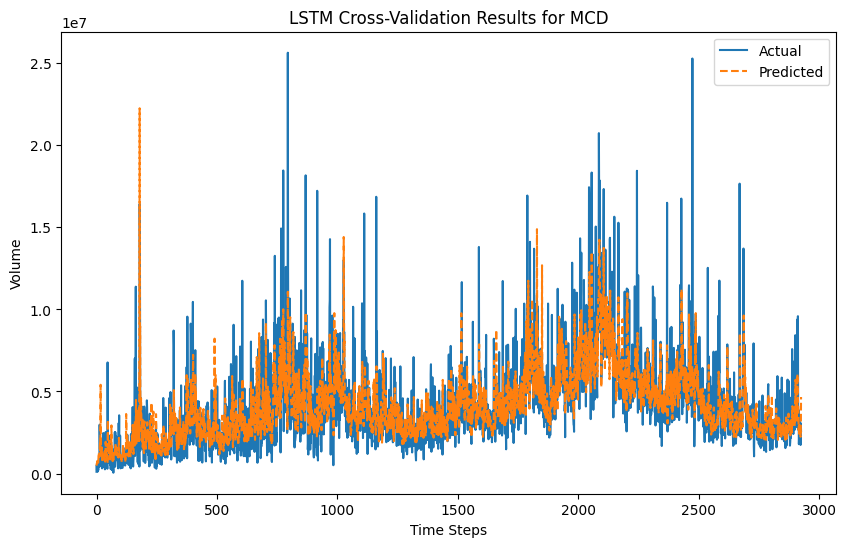

Cross-Validation Results for MCD:
Fold MSE: [3927397311583.947, 6012117923117.373, 5922246409326.23, 4675563107405.486, 3475447147712.161]
Average MSE: 4802554379829.0400
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


159/159 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 0.0018 - val_loss: 7.2713e-04
Epoch 2/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0013 - val_loss: 7.6669e-04
Epoch 3/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0010 - val_loss: 6.8087e-04
Epoch 4/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0012 - val_loss: 6.5768e-04
Epoch 5/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0010 - val_loss: 7.0163e-04
Epoch 6/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0012 - val_loss: 8.0584e-04
Epoch 7/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0015 - val_loss: 6.5599e-04
Epoch 8/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 5.8057e-04 - val_loss: 5.8793e-04
Epoch 9/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 7.9538e-04 - val_loss: 6.1001e-04
Epoch 10/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 9.7311e-04 - val_loss: 6.6847e-04
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - loss: 0.0014 - val_loss: 0.0019
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 7.8732e-04 - val_loss: 0.0019
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 8.4591e-04 - val_loss: 0.0017
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 7.7199e-04 - val_loss: 0.0015
Epoch 6/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 6.9522e-04 - val_loss: 0.0014
Epoch 7/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 7.6810e-04 - val_loss: 0.0018
Epoch 8/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 8.9655e-04 - val_loss: 0.0016
Epoch 9/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 6.5867e-04 - val_loss: 0.0013
Epoch 10/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 5.5460e-04 - val_loss: 0.0013
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 33s 47ms/step - loss: 0.0013 - val_loss: 9.5157e-04
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0011 - val_loss: 9.2398e-04
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0011 - val_loss: 8.3937e-04
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0012 - val_loss: 8.7368e-04
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 7.9456e-04 - val_loss: 8.1414e-04
Epoch 6/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 9.4230e-04 - val_loss: 7.1125e-04
Epoch 7/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 9.5493e-04 - val_loss: 7.1917e-04
Epoch 8/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 6.8436e-04 - val_loss: 8.5748e-04
Epoch 9/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0010 - val_loss: 6.4055e-04
Epoch 10/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 8.8559e-04 - val_loss: 0.0013
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - loss: 0.0016 - val_loss: 6.4313e-04
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0011 - val_loss: 5.6837e-04
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 9.7469e-04 - val_loss: 5.9130e-04
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 9.9195e-04 - val_loss: 5.1511e-04
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 9.5366e-04 - val_loss: 4.8131e-04
Epoch 6/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 8.3585e-04 - val_loss: 5.8947e-04
Epoch 7/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0011 - val_loss: 4.6113e-04
Epoch 8/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 8.0755e-04 - val_loss: 5.2894e-04
Epoch 9/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 6.8631e-04 - val_loss: 4.5021e-04
Epoch 10/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 8.5942e-04 - val_loss: 4.8018e-04
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 9.4545e-04 - val_loss: 0.0011
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 9.7280e-04 - val_loss: 0.0012
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 8.8720e-04 - val_loss: 0.0010
Epoch 6/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 7.0814e-04 - val_loss: 0.0011
Epoch 7/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 9.3722e-04 - val_loss: 0.0010
Epoch 8/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 9.6667e-04 - val_loss: 0.0011
Epoch 9/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 8.7180e-04 - val_loss: 0.0010
Epoch 10/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 7.8731e-04 - val_loss: 0.0011
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step


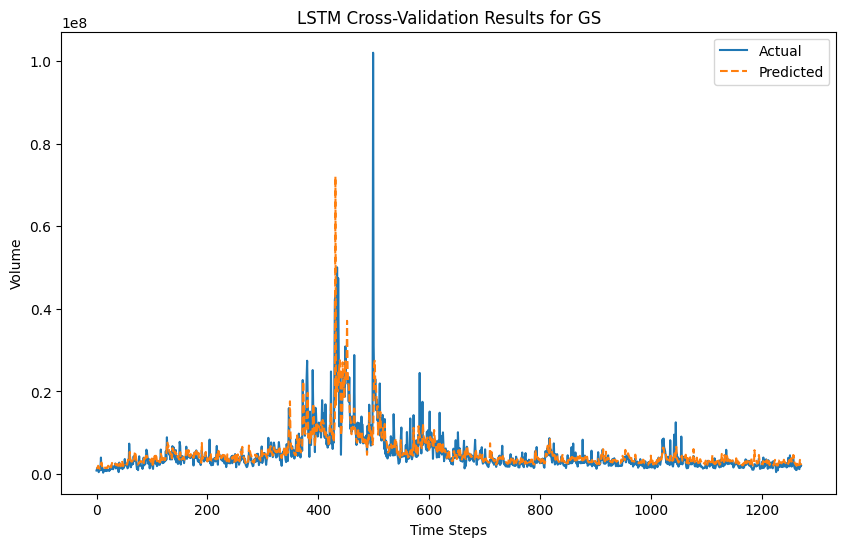

Cross-Validation Results for GS:
Fold MSE: [7705674490908.154, 17372826112621.28, 8395269299967.242, 5900646906524.652, 13368927222326.37]
Average MSE: 10548668806469.5391
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


330/330 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 2/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 3/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - loss: 9.2645e-04 - val_loss: 9.9158e-04
Epoch 4/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 9.5960e-04 - val_loss: 9.9229e-04
Epoch 5/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 9.9249e-04 - val_loss: 0.0010
Epoch 6/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 9.5799e-04 - val_loss: 0.0011
Epoch 7/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - loss: 8.5547e-04 - val_loss: 9.9951e-04
Epoch 8/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 8.0800e-04 - val_loss: 9.5729e-04
Epoch 9/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - loss: 8.5368e-04 - val_loss: 9.8368e-04
Epoch 10/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 9.7108e-04 - val_loss: 9.5861e-04
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


330/330 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - loss: 0.0012 - val_loss: 8.3586e-04
Epoch 2/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - loss: 0.0011 - val_loss: 0.0021
Epoch 3/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - loss: 0.0015 - val_loss: 8.2520e-04
Epoch 4/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - loss: 0.0011 - val_loss: 8.2491e-04
Epoch 5/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - loss: 9.4295e-04 - val_loss: 9.1732e-04
Epoch 6/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 9.9038e-04 - val_loss: 9.6067e-04
Epoch 7/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - loss: 9.7073e-04 - val_loss: 8.8625e-04
Epoch 8/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - loss: 0.0011 - val_loss: 8.2562e-04
Epoch 9/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 8.1111e-04 - val_loss: 8.1158e-04
Epoch 10/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 8.7289e-04 - val_loss: 7.9847e-04
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 2/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - loss: 0.0010 - val_loss: 9.9479e-04
Epoch 3/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - loss: 9.1437e-04 - val_loss: 0.0010
Epoch 4/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - loss: 9.4590e-04 - val_loss: 0.0010
Epoch 5/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - loss: 9.2423e-04 - val_loss: 9.4371e-04
Epoch 6/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - loss: 9.6446e-04 - val_loss: 9.1294e-04
Epoch 7/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - loss: 8.4854e-04 - val_loss: 9.5346e-04
Epoch 8/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 9.3432e-04 - val_loss: 8.8708e-04
Epoch 9/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - loss: 8.3184e-04 - val_loss: 8.7621e-04
Epoch 10/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - loss: 9.0837e-04 - val_loss: 8.5800e-04
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


330/330 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - loss: 0.0012 - val_loss: 9.3957e-04
Epoch 2/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - loss: 9.7711e-04 - val_loss: 9.3987e-04
Epoch 3/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - loss: 9.6930e-04 - val_loss: 9.4382e-04
Epoch 4/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - loss: 9.1465e-04 - val_loss: 9.4203e-04
Epoch 5/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - loss: 9.6465e-04 - val_loss: 9.4250e-04
Epoch 6/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - loss: 8.3287e-04 - val_loss: 8.7967e-04
Epoch 7/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 9.7833e-04 - val_loss: 9.0794e-04
Epoch 8/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - loss: 8.3917e-04 - val_loss: 9.6243e-04
Epoch 9/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 9.0562e-04 - val_loss: 8.2022e-04
Epoch 10/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - loss: 8.9481e-04 - val_loss: 0.0011
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - loss: 0.0014 - val_loss: 9.2209e-04
Epoch 2/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 0.0011 - val_loss: 8.3321e-04
Epoch 3/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 8.9100e-04 - val_loss: 8.5558e-04
Epoch 4/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 9.0656e-04 - val_loss: 7.9611e-04
Epoch 5/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - loss: 9.2221e-04 - val_loss: 8.7066e-04
Epoch 6/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - loss: 8.9261e-04 - val_loss: 8.4292e-04
Epoch 7/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 8.6078e-04 - val_loss: 7.6309e-04
Epoch 8/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 9.4627e-04 - val_loss: 8.1588e-04
Epoch 9/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 9.6228e-04 - val_loss: 8.5162e-04
Epoch 10/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 8.8614e-04 - val_loss: 7.6017e-04
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step


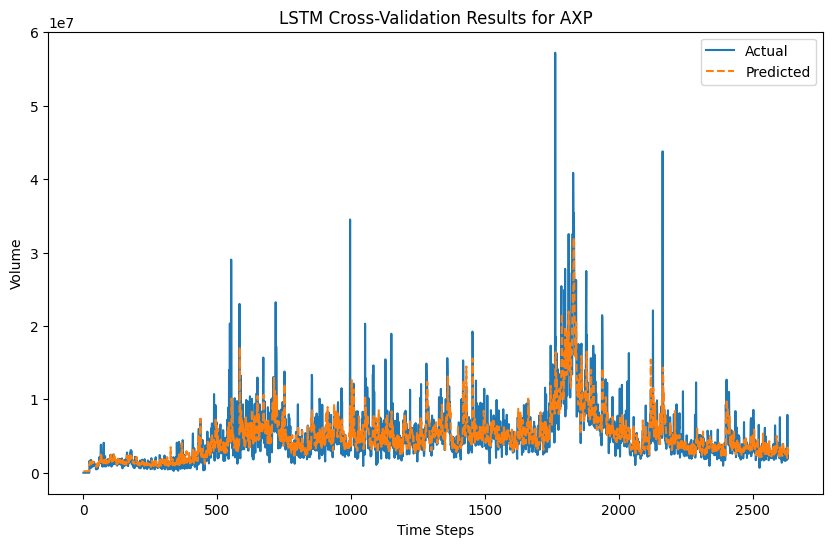

Cross-Validation Results for AXP:
Fold MSE: [7812175648616.426, 6516108214937.32, 7001897667711.42, 6693634356032.529, 6203547291537.166]
Average MSE: 6845472635766.9717
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


394/394 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - loss: 9.8908e-04 - val_loss: 8.1019e-04
Epoch 2/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 8.3861e-04 - val_loss: 7.6369e-04
Epoch 3/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 9.0288e-04 - val_loss: 7.9508e-04
Epoch 4/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 9.4706e-04 - val_loss: 8.0717e-04
Epoch 5/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 7.7916e-04 - val_loss: 7.0617e-04
Epoch 6/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - loss: 7.1715e-04 - val_loss: 7.4534e-04
Epoch 7/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 7.4026e-04 - val_loss: 7.1127e-04
Epoch 8/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 8.7432e-04 - val_loss: 6.9970e-04
Epoch 9/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 7.9156e-04 - val_loss: 7.5580e-04
Epoch 10/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 7.0616e-04 - val_loss: 7.1764e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step
Epoch 1/10

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


395/395 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - loss: 0.0015 - val_loss: 6.9087e-04
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 9.0532e-04 - val_loss: 6.2089e-04
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - loss: 8.8095e-04 - val_loss: 5.9137e-04
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - loss: 9.5267e-04 - val_loss: 5.9324e-04
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 7.6336e-04 - val_loss: 5.8243e-04
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 7.9806e-04 - val_loss: 6.6167e-04
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0011 - val_loss: 5.8218e-04
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 7.7985e-04 - val_loss: 5.8093e-04
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 7.9918e-04 - val_loss: 5.9223e-04
Epoch 10/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 8.1366e-04 - val_loss: 6.5039e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - loss: 0.0010 - val_loss: 8.8149e-04
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 9.1012e-04 - val_loss: 8.2112e-04
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 7.5209e-04 - val_loss: 7.9358e-04
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 9.1676e-04 - val_loss: 7.6647e-04
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 8.2537e-04 - val_loss: 7.6293e-04
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 6.4468e-04 - val_loss: 7.5353e-04
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - loss: 9.1585e-04 - val_loss: 7.7362e-04
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 7.6064e-04 - val_loss: 9.4202e-04
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 0.0011 - val_loss: 8.1027e-04
Epoch 10/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 6.9363e-04 - val_loss: 8.2156e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
Epoch 1

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 8.6591e-04 - val_loss: 9.6306e-04
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - loss: 7.6787e-04 - val_loss: 9.2748e-04
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 7.3898e-04 - val_loss: 9.0955e-04
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - loss: 6.9759e-04 - val_loss: 9.1979e-04
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 7.3317e-04 - val_loss: 9.7315e-04
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 7.2029e-04 - val_loss: 9.2661e-04
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 8.0844e-04 - val_loss: 9.3661e-04
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 7.7220e-04 - val_loss: 9.0944e-04
Epoch 10/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 8.3833e-04 - val_loss: 9.4868e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


395/395 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - loss: 0.0011 - val_loss: 9.1865e-04
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 8.5480e-04 - val_loss: 7.6524e-04
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 7.6360e-04 - val_loss: 8.3121e-04
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - loss: 7.9076e-04 - val_loss: 7.2888e-04
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 7.4893e-04 - val_loss: 7.3137e-04
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 9.2298e-04 - val_loss: 7.3184e-04
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 8.1903e-04 - val_loss: 8.2395e-04
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - loss: 8.3686e-04 - val_loss: 7.4617e-04
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 7.4528e-04 - val_loss: 7.0806e-04
Epoch 10/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 7.1554e-04 - val_loss: 6.9773e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


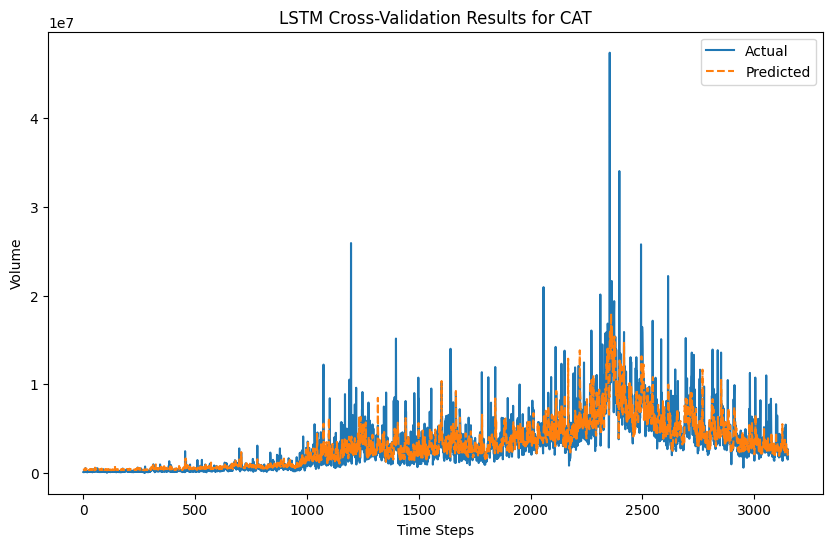

Cross-Validation Results for CAT:
Fold MSE: [3213074737607.5903, 2667681194903.3735, 3460273169718.504, 4176206006147.1504, 3204039734417.392]
Average MSE: 3344254968558.8022
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


394/394 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - loss: 0.0010 - val_loss: 4.2698e-04
Epoch 2/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 7.9046e-04 - val_loss: 4.7044e-04
Epoch 3/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 6.0571e-04 - val_loss: 4.9610e-04
Epoch 4/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 5.9268e-04 - val_loss: 4.2558e-04
Epoch 5/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - loss: 5.9425e-04 - val_loss: 4.6838e-04
Epoch 6/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 6.2244e-04 - val_loss: 4.0160e-04
Epoch 7/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 5.5198e-04 - val_loss: 4.5947e-04
Epoch 8/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 6.5402e-04 - val_loss: 4.4745e-04
Epoch 9/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - loss: 7.1125e-04 - val_loss: 4.5485e-04
Epoch 10/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 5.7629e-04 - val_loss: 4.6633e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - loss: 8.9967e-04 - val_loss: 7.8770e-04
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 6.5929e-04 - val_loss: 7.0718e-04
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 5.4710e-04 - val_loss: 6.7276e-04
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 5.8876e-04 - val_loss: 6.7080e-04
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - loss: 6.3229e-04 - val_loss: 6.1711e-04
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 6.1656e-04 - val_loss: 6.3465e-04
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 7.4724e-04 - val_loss: 6.0703e-04
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - loss: 5.3602e-04 - val_loss: 6.0350e-04
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - loss: 5.9424e-04 - val_loss: 6.2192e-04
Epoch 10/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - loss: 4.4402e-04 - val_loss: 6.9267e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - loss: 9.6065e-04 - val_loss: 6.3588e-04
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - loss: 6.5083e-04 - val_loss: 6.0386e-04
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 7.0194e-04 - val_loss: 6.0714e-04
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 6.0810e-04 - val_loss: 5.5676e-04
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 6.8222e-04 - val_loss: 7.0803e-04
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 5.5430e-04 - val_loss: 5.4782e-04
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - loss: 7.2177e-04 - val_loss: 5.5264e-04
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 6.8501e-04 - val_loss: 7.1603e-04
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 7.0449e-04 - val_loss: 6.4620e-04
Epoch 10/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 6.6671e-04 - val_loss: 5.9852e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - loss: 8.2670e-04 - val_loss: 6.0467e-04
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - loss: 7.5252e-04 - val_loss: 5.6016e-04
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 6.2274e-04 - val_loss: 6.4671e-04
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - loss: 6.3440e-04 - val_loss: 5.1187e-04
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - loss: 6.1655e-04 - val_loss: 4.9083e-04
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 6.6745e-04 - val_loss: 4.8813e-04
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 5.7808e-04 - val_loss: 5.0151e-04
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 6.4655e-04 - val_loss: 4.8332e-04
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 6.5964e-04 - val_loss: 4.9769e-04
Epoch 10/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 5.5248e-04 - val_loss: 6.2789e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - loss: 0.0010 - val_loss: 7.7313e-04
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 8.0006e-04 - val_loss: 7.8457e-04
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 6.0327e-04 - val_loss: 7.5377e-04
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 6.5215e-04 - val_loss: 7.4400e-04
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 6.4244e-04 - val_loss: 0.0011
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 5.3098e-04 - val_loss: 7.3245e-04
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - loss: 4.9131e-04 - val_loss: 7.5894e-04
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 5.6359e-04 - val_loss: 8.2141e-04
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 7.0657e-04 - val_loss: 7.1540e-04
Epoch 10/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 5.0306e-04 - val_loss: 8.2241e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


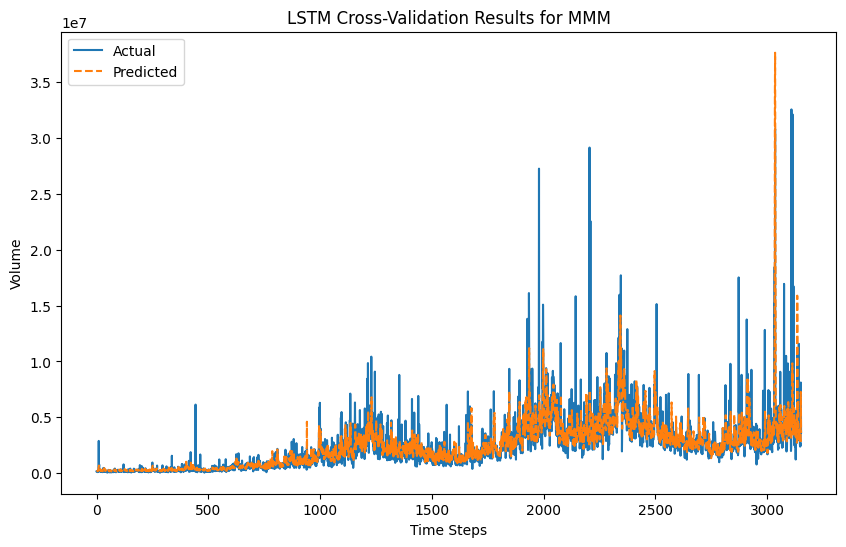

Cross-Validation Results for MMM:
Fold MSE: [1465863039490.1401, 2202822932346.343, 1999564831863.054, 1764160511839.9463, 2611256834327.8906]
Average MSE: 2008733629973.4751
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


394/394 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - loss: 6.7219e-04 - val_loss: 9.5589e-04
Epoch 2/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - loss: 7.2943e-04 - val_loss: 5.6654e-04
Epoch 3/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - loss: 6.7932e-04 - val_loss: 6.0588e-04
Epoch 4/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - loss: 5.9477e-04 - val_loss: 5.1603e-04
Epoch 5/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - loss: 5.2736e-04 - val_loss: 4.8838e-04
Epoch 6/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - loss: 6.1133e-04 - val_loss: 5.3745e-04
Epoch 7/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 6.1617e-04 - val_loss: 5.3562e-04
Epoch 8/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 6.3518e-04 - val_loss: 4.7881e-04
Epoch 9/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 7.8215e-04 - val_loss: 4.5588e-04
Epoch 10/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 5.6142e-04 - val_loss: 4.9960e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
Epoch 1/10

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


394/394 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - loss: 0.0010 - val_loss: 7.0693e-04
Epoch 2/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 6.6948e-04 - val_loss: 6.7068e-04
Epoch 3/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 6.8437e-04 - val_loss: 6.2796e-04
Epoch 4/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 5.9213e-04 - val_loss: 6.0718e-04
Epoch 5/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 6.3568e-04 - val_loss: 6.0716e-04
Epoch 6/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - loss: 6.9455e-04 - val_loss: 5.7228e-04
Epoch 7/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - loss: 5.3830e-04 - val_loss: 6.5859e-04
Epoch 8/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 6.1962e-04 - val_loss: 6.2062e-04
Epoch 9/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 5.9791e-04 - val_loss: 5.6241e-04
Epoch 10/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 6.7959e-04 - val_loss: 5.6598e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


394/394 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - loss: 7.2139e-04 - val_loss: 6.4561e-04
Epoch 2/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - loss: 6.1496e-04 - val_loss: 6.0496e-04
Epoch 3/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - loss: 6.2758e-04 - val_loss: 5.8250e-04
Epoch 4/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - loss: 6.0476e-04 - val_loss: 6.1103e-04
Epoch 5/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 6.3821e-04 - val_loss: 5.4747e-04
Epoch 6/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 5.9349e-04 - val_loss: 7.2524e-04
Epoch 7/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - loss: 6.0000e-04 - val_loss: 5.9059e-04
Epoch 8/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 5.9649e-04 - val_loss: 5.0185e-04
Epoch 9/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 5.3201e-04 - val_loss: 5.3707e-04
Epoch 10/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 5.6558e-04 - val_loss: 5.0719e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - loss: 7.6729e-04 - val_loss: 6.5409e-04
Epoch 2/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 6.2356e-04 - val_loss: 6.1492e-04
Epoch 3/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 7.3866e-04 - val_loss: 6.0793e-04
Epoch 4/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 5.8543e-04 - val_loss: 6.4203e-04
Epoch 5/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 6.4884e-04 - val_loss: 5.5144e-04
Epoch 6/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 6.7715e-04 - val_loss: 5.1796e-04
Epoch 7/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 5.7008e-04 - val_loss: 5.4966e-04
Epoch 8/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 6.3436e-04 - val_loss: 5.0765e-04
Epoch 9/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 5.8640e-04 - val_loss: 5.0284e-04
Epoch 10/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 5.8901e-04 - val_loss: 5.3009e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


394/394 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - loss: 0.0011 - val_loss: 5.9424e-04
Epoch 2/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 6.3050e-04 - val_loss: 6.0345e-04
Epoch 3/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 6.7237e-04 - val_loss: 5.1903e-04
Epoch 4/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 6.6447e-04 - val_loss: 5.1335e-04
Epoch 5/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 7.3950e-04 - val_loss: 5.7161e-04
Epoch 6/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - loss: 6.2745e-04 - val_loss: 4.9694e-04
Epoch 7/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 6.0498e-04 - val_loss: 5.0687e-04
Epoch 8/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 5.8720e-04 - val_loss: 8.4806e-04
Epoch 9/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - loss: 5.9409e-04 - val_loss: 5.0797e-04
Epoch 10/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - loss: 5.9848e-04 - val_loss: 4.9526e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


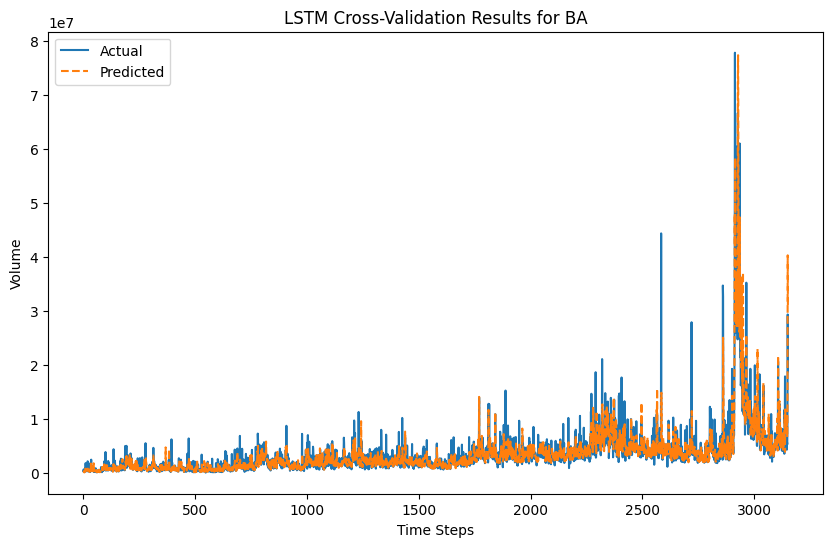

Cross-Validation Results for BA:
Fold MSE: [4849584272681.375, 5982782482634.082, 5338580726515.963, 5349157982680.899, 5268492149255.673]
Average MSE: 5357719522753.5986
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


394/394 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 2/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 3/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 4/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 5/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 6/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 7/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 8/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 9/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 10/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - loss: 0.0011 - val_loss: 0.0011
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - loss: 9.7420e-04 - val_loss: 0.0011
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 9.1373e-04 - val_loss: 0.0012
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0010 - val_loss: 0.0011
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 10/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 9.9506e-04 - val_loss: 0.0011
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


395/395 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - loss: 0.0021 - val_loss: 0.0011
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0011 - val_loss: 9.9140e-04
Epoch 10/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0010 - val_loss: 0.0010
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


395/395 ━━━━━━━━━━━━━━━━━━━━ 53s 42ms/step - loss: 0.0025 - val_loss: 0.0010
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 0.0012 - val_loss: 9.7560e-04
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - loss: 0.0012 - val_loss: 9.7848e-04
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step - loss: 0.0013 - val_loss: 8.9411e-04
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - loss: 0.0011 - val_loss: 8.5688e-04
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - loss: 0.0011 - val_loss: 8.8965e-04
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0013 - val_loss: 8.7892e-04
Epoch 10/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - loss: 0.0010 - val_loss: 0.0010
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step


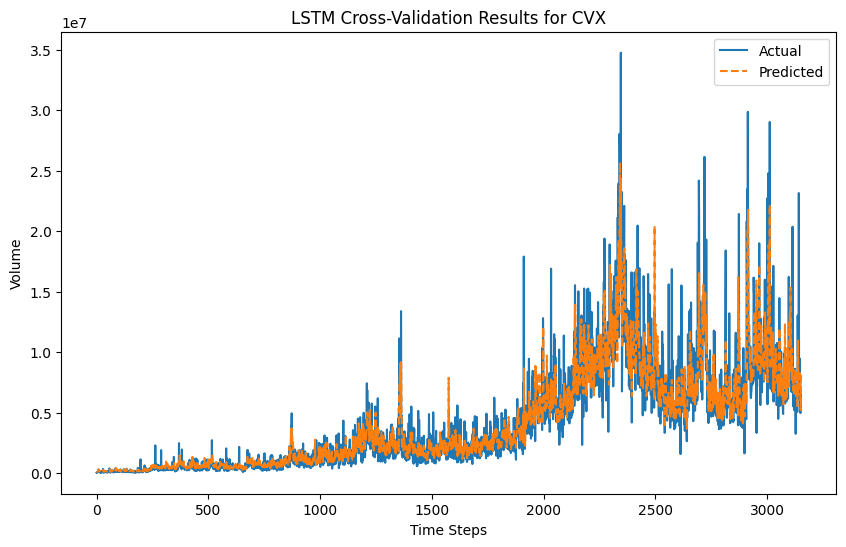

Cross-Validation Results for CVX:
Fold MSE: [3505432057774.8823, 3545133914088.091, 3510480602718.996, 3242442944415.9834, 2802492276759.389]
Average MSE: 3321196359151.4683


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - loss: 0.0015 - val_loss: 9.9680e-04
Epoch 2/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0010 - val_loss: 9.8938e-04
Epoch 3/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0011 - val_loss: 8.9861e-04
Epoch 4/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 9.6974e-04 - val_loss: 8.7176e-04
Epoch 5/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0010 - val_loss: 8.5170e-04
Epoch 6/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 9.8066e-04 - val_loss: 8.5708e-04
Epoch 7/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0010 - val_loss: 8.4797e-04
Epoch 8/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 9.8871e-04 - val_loss: 9.0147e-04
Epoch 9/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 8.6907e-04 - val_loss: 8.3981e-04
Epoch 10/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 8.5928e-04 - val_loss: 8.2820e-04
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 2/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 3/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 4/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 8.3546e-04 - val_loss: 0.0015
Epoch 5/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 8.3135e-04 - val_loss: 0.0012
Epoch 6/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 8.4397e-04 - val_loss: 0.0012
Epoch 7/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 8.9313e-04 - val_loss: 0.0012
Epoch 8/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 8.2477e-04 - val_loss: 0.0012
Epoch 9/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 8.0398e-04 - val_loss: 0.0012
Epoch 10/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 8.1579e-04 - val_loss: 0.0012
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - loss: 0.0011 - val_loss: 8.9024e-04
Epoch 2/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0013 - val_loss: 8.3447e-04
Epoch 3/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0011 - val_loss: 7.8534e-04
Epoch 4/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0010 - val_loss: 7.6308e-04
Epoch 5/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 9.2847e-04 - val_loss: 7.4241e-04
Epoch 6/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 9.4592e-04 - val_loss: 7.3659e-04
Epoch 7/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0011 - val_loss: 7.4390e-04
Epoch 8/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 8.4198e-04 - val_loss: 7.3266e-04
Epoch 9/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 9.2854e-04 - val_loss: 7.2382e-04
Epoch 10/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 7.9538e-04 - val_loss: 7.8840e-04
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 2/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 3/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 4/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 9.7284e-04 - val_loss: 0.0010
Epoch 5/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 8.9406e-04 - val_loss: 0.0010
Epoch 6/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0011 - val_loss: 9.9890e-04
Epoch 7/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 8.8106e-04 - val_loss: 0.0010
Epoch 8/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 9.0260e-04 - val_loss: 9.9697e-04
Epoch 9/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 8.7190e-04 - val_loss: 0.0010
Epoch 10/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 7.5688e-04 - val_loss: 0.0010
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - loss: 0.0012 - val_loss: 8.5108e-04
Epoch 2/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0011 - val_loss: 8.7210e-04
Epoch 3/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 9.2603e-04 - val_loss: 7.8506e-04
Epoch 4/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 9.1059e-04 - val_loss: 7.9967e-04
Epoch 5/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0010 - val_loss: 8.1100e-04
Epoch 6/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 9.8401e-04 - val_loss: 7.6083e-04
Epoch 7/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0014 - val_loss: 8.7864e-04
Epoch 8/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 9.4660e-04 - val_loss: 7.6232e-04
Epoch 9/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0011 - val_loss: 7.6256e-04
Epoch 10/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 8.8466e-04 - val_loss: 8.5886e-04
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


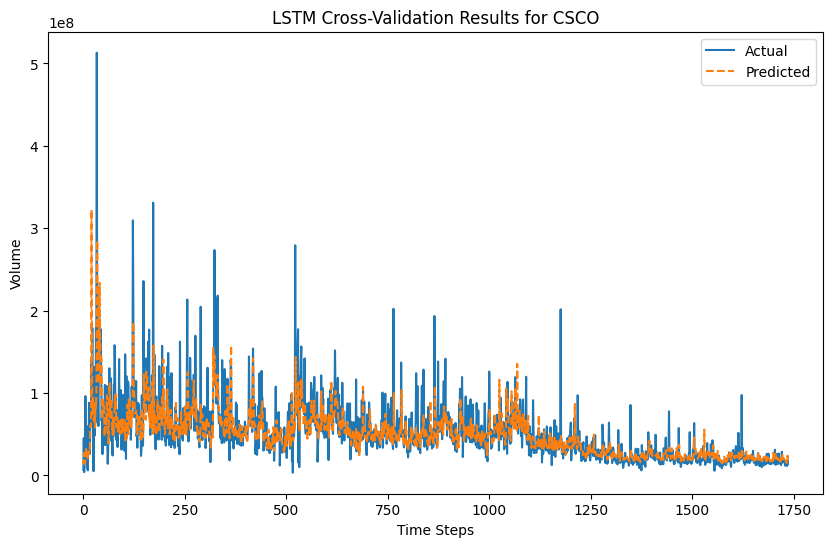

Cross-Validation Results for CSCO:
Fold MSE: [731536909176208.0, 1031241110560112.0, 639338926566879.0, 880603172733357.0, 672025434531107.1]
Average MSE: 790949110713532.6250
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


394/394 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 2/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 3/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 4/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 0.0012 - val_loss: 9.6675e-04
Epoch 5/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 6/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 7/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - loss: 0.0011 - val_loss: 9.3944e-04
Epoch 8/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 9/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.0011 - val_loss: 9.9584e-04
Epoch 10/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - loss: 0.0011 - val_loss: 9.4971e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 10/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 0.0011 - val_loss: 0.0012
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


395/395 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - loss: 0.0023 - val_loss: 0.0011
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0014 - val_loss: 9.1564e-04
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0012 - val_loss: 9.2950e-04
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0012 - val_loss: 9.1408e-04
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0011 - val_loss: 9.0684e-04
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 0.0013 - val_loss: 8.9000e-04
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 0.0013 - val_loss: 9.6879e-04
Epoch 10/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - loss: 0.0012 - val_loss: 9.8760e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 0.0010 - val_loss: 9.6432e-04
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - loss: 0.0012 - val_loss: 9.7099e-04
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 10/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0012 - val_loss: 0.0010
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 30s 61ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 10/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 0.0010 - val_loss: 0.0013
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step


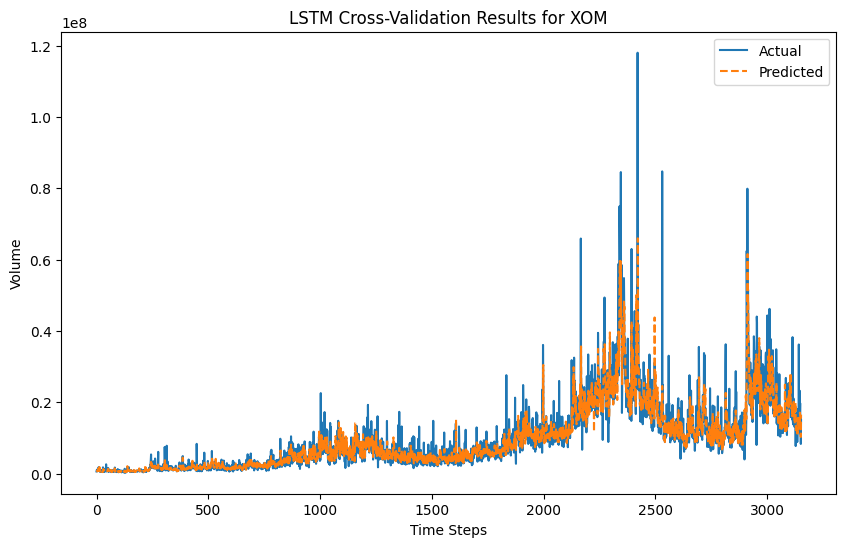

Cross-Validation Results for XOM:
Fold MSE: [13046947114974.143, 15679416611216.082, 12360330890210.705, 13392486245485.012, 16754037570679.762]
Average MSE: 14246643686513.1406


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - loss: 6.3184e-04 - val_loss: 5.1000e-04
Epoch 2/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 6.1437e-04 - val_loss: 4.6824e-04
Epoch 3/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 5.2295e-04 - val_loss: 5.9584e-04
Epoch 4/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 4.9370e-04 - val_loss: 4.6562e-04
Epoch 5/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 4.4719e-04 - val_loss: 4.4705e-04
Epoch 6/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 4.8048e-04 - val_loss: 5.4033e-04
Epoch 7/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 5.2397e-04 - val_loss: 4.5494e-04
Epoch 8/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 4.9958e-04 - val_loss: 5.2996e-04
Epoch 9/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - loss: 4.9368e-04 - val_loss: 4.4153e-04
Epoch 10/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - loss: 5.4981e-04 - val_loss: 4.7850e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


395/395 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - loss: 7.1711e-04 - val_loss: 5.6921e-04
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 5.3673e-04 - val_loss: 4.9360e-04
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 5.5604e-04 - val_loss: 4.6272e-04
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 4.7911e-04 - val_loss: 4.4447e-04
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 5.4616e-04 - val_loss: 7.3670e-04
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 5.2641e-04 - val_loss: 4.1935e-04
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - loss: 4.2507e-04 - val_loss: 4.9374e-04
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 5.2131e-04 - val_loss: 4.4358e-04
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 5.1894e-04 - val_loss: 4.1997e-04
Epoch 10/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - loss: 4.7640e-04 - val_loss: 4.4560e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
Epoch 1/10

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


395/395 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - loss: 6.7948e-04 - val_loss: 8.2128e-04
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 5.9925e-04 - val_loss: 5.7757e-04
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 5.3141e-04 - val_loss: 5.4832e-04
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 4.6263e-04 - val_loss: 5.3656e-04
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 5.9684e-04 - val_loss: 5.1872e-04
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 4.3793e-04 - val_loss: 6.4903e-04
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 4.7775e-04 - val_loss: 5.3315e-04
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 6.4734e-04 - val_loss: 5.1851e-04
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - loss: 4.6727e-04 - val_loss: 5.0136e-04
Epoch 10/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 4.4978e-04 - val_loss: 7.7919e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - loss: 8.7721e-04 - val_loss: 5.8529e-04
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 5.6744e-04 - val_loss: 5.4342e-04
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 4.7193e-04 - val_loss: 5.4407e-04
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 3.8206e-04 - val_loss: 5.2851e-04
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 4.9222e-04 - val_loss: 6.5305e-04
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 4.6978e-04 - val_loss: 4.8898e-04
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 4.3648e-04 - val_loss: 5.0453e-04
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 4.5573e-04 - val_loss: 4.6372e-04
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 4.8826e-04 - val_loss: 4.6571e-04
Epoch 10/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 6.0435e-04 - val_loss: 5.2258e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


395/395 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - loss: 7.8124e-04 - val_loss: 4.6181e-04
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 5.4413e-04 - val_loss: 4.5024e-04
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 5.5262e-04 - val_loss: 4.6253e-04
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 5.4574e-04 - val_loss: 4.0610e-04
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 5.0610e-04 - val_loss: 3.9463e-04
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - loss: 4.4713e-04 - val_loss: 3.6675e-04
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - loss: 3.9145e-04 - val_loss: 3.4715e-04
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 5.1532e-04 - val_loss: 4.1069e-04
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 4.8221e-04 - val_loss: 4.2906e-04
Epoch 10/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 5.5165e-04 - val_loss: 3.4657e-04
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step


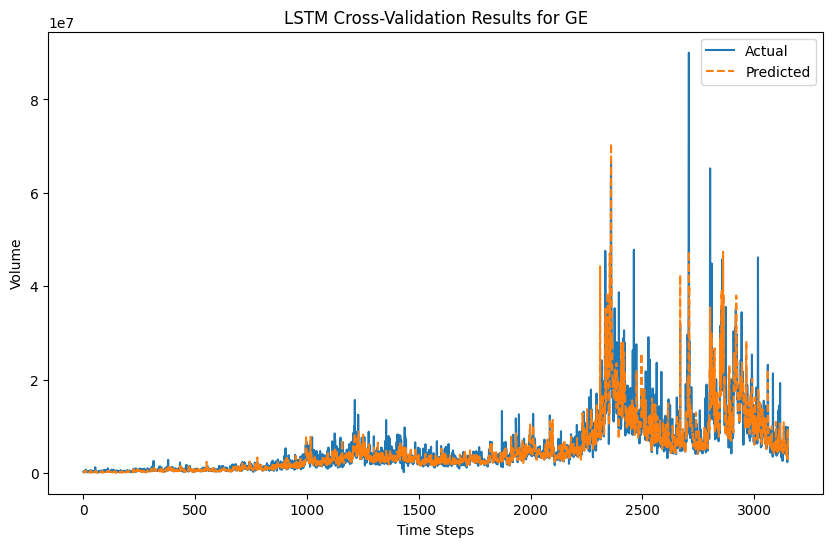

Cross-Validation Results for GE:
Fold MSE: [10897446897446.314, 10350079263721.88, 12374102731083.602, 11445208110996.695, 8553856185648.034]
Average MSE: 10724138637779.3047


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - loss: 0.0023 - val_loss: 0.0010
Epoch 2/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 3/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 0.0014 - val_loss: 9.1127e-04
Epoch 4/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - loss: 0.0012 - val_loss: 8.9491e-04
Epoch 5/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - loss: 0.0013 - val_loss: 8.4701e-04
Epoch 6/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - loss: 0.0016 - val_loss: 9.0622e-04
Epoch 7/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - loss: 0.0012 - val_loss: 9.0359e-04
Epoch 8/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - loss: 0.0011 - val_loss: 8.4311e-04
Epoch 9/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - loss: 0.0011 - val_loss: 8.3087e-04
Epoch 10/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 0.0013 - val_loss: 8.9488e-04
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


330/330 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 2/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 3/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 4/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 5/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 6/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 7/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 8/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 9/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 10/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 0.0013 - val_loss: 0.0016
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 2/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 3/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 4/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 5/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 6/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 7/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 8/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 9/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 10/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 0.0014 - val_loss: 0.0012
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


330/330 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 2/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - loss: 0.0016 - val_loss: 9.7414e-04
Epoch 3/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 4/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 0.0014 - val_loss: 8.8417e-04
Epoch 5/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 0.0011 - val_loss: 8.3784e-04
Epoch 6/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 0.0012 - val_loss: 8.4200e-04
Epoch 7/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - loss: 0.0012 - val_loss: 8.0352e-04
Epoch 8/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - loss: 0.0015 - val_loss: 8.3742e-04
Epoch 9/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 0.0010 - val_loss: 8.2257e-04
Epoch 10/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - loss: 0.0011 - val_loss: 8.1099e-04
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


330/330 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 2/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 3/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 4/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 5/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 6/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 7/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - loss: 9.7116e-04 - val_loss: 0.0013
Epoch 8/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 9/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 9.2766e-04 - val_loss: 0.0013
Epoch 10/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 0.0011 - val_loss: 0.0013
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


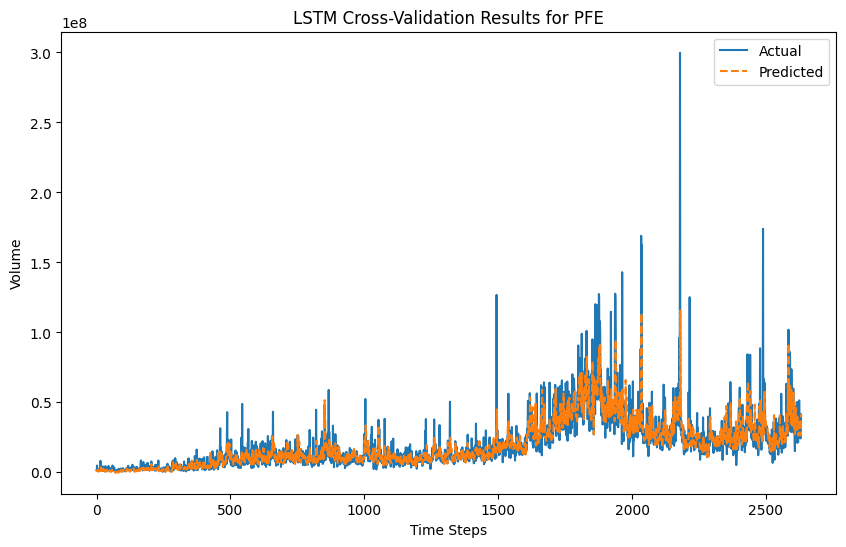

Cross-Validation Results for PFE:
Fold MSE: [77484874373497.58, 139337984739515.27, 113593032366260.62, 74934182816505.12, 114188997166317.16]
Average MSE: 103907814292419.1562
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - loss: 4.1834e-04 - val_loss: 5.6269e-05
Epoch 2/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 1.4336e-04 - val_loss: 5.0283e-05
Epoch 3/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 1.3665e-04 - val_loss: 4.8327e-05
Epoch 4/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 2.3399e-04 - val_loss: 4.7897e-05
Epoch 5/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - loss: 3.5800e-04 - val_loss: 4.9858e-05
Epoch 6/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 8.4837e-05 - val_loss: 4.9407e-05
Epoch 7/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 1.2162e-04 - val_loss: 5.9468e-05
Epoch 8/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 2.7557e-04 - val_loss: 4.9521e-05
Epoch 9/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - loss: 4.8521e-04 - val_loss: 4.5211e-05
Epoch 10/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 9.7096e-05 - val_loss: 5.8459e-05
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Epoch 1/10

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 16s 45ms/step - loss: 3.1385e-04 - val_loss: 6.7394e-05
Epoch 2/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - loss: 3.2362e-04 - val_loss: 6.7499e-05
Epoch 3/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 2.4627e-04 - val_loss: 6.1761e-05
Epoch 4/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 3.6191e-04 - val_loss: 5.8763e-05
Epoch 5/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 9.8863e-05 - val_loss: 5.8843e-05
Epoch 6/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 1.2684e-04 - val_loss: 6.2801e-05
Epoch 7/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 2.8508e-04 - val_loss: 5.8253e-05
Epoch 8/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 1.2476e-04 - val_loss: 5.6264e-05
Epoch 9/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 1.7418e-04 - val_loss: 5.5878e-05
Epoch 10/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 1.0072e-04 - val_loss: 5.4404e-05
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step
Epoch 1/10

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 17s 47ms/step - loss: 4.5099e-04 - val_loss: 6.9146e-05
Epoch 2/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 1.0486e-04 - val_loss: 8.9021e-05
Epoch 3/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 1.5742e-04 - val_loss: 6.7242e-05
Epoch 4/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 7.3934e-05 - val_loss: 5.8618e-05
Epoch 5/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 2.3857e-04 - val_loss: 5.8630e-05
Epoch 6/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 2.9381e-04 - val_loss: 5.7681e-05
Epoch 7/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 2.1510e-04 - val_loss: 6.4297e-05
Epoch 8/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 1.8284e-04 - val_loss: 5.6316e-05
Epoch 9/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 1.9009e-04 - val_loss: 5.8087e-05
Epoch 10/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 1.0966e-04 - val_loss: 5.4484e-05
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
Epoch 1/10

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - loss: 1.1382e-04 - val_loss: 5.2511e-04
Epoch 2/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - loss: 7.1818e-05 - val_loss: 5.3591e-04
Epoch 3/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 6.6352e-05 - val_loss: 5.0962e-04
Epoch 4/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 5.9834e-05 - val_loss: 5.1001e-04
Epoch 5/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 6.1476e-05 - val_loss: 5.1992e-04
Epoch 6/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 5.7345e-05 - val_loss: 4.9309e-04
Epoch 7/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 6.8095e-05 - val_loss: 5.0281e-04
Epoch 8/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 6.1472e-05 - val_loss: 4.8662e-04
Epoch 9/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 5.4013e-05 - val_loss: 4.8410e-04
Epoch 10/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 5.3886e-05 - val_loss: 4.9200e-04
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step
Epoch 1/10

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - loss: 1.7610e-04 - val_loss: 7.2661e-05
Epoch 2/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 1.2833e-04 - val_loss: 6.5520e-05
Epoch 3/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 7.2613e-05 - val_loss: 1.2313e-04
Epoch 4/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 1.3977e-04 - val_loss: 5.8524e-05
Epoch 5/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 1.5075e-04 - val_loss: 5.6786e-05
Epoch 6/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 8.3237e-05 - val_loss: 5.4623e-05
Epoch 7/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 1.0583e-04 - val_loss: 5.4701e-05
Epoch 8/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 1.3414e-04 - val_loss: 5.8849e-05
Epoch 9/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 7.4043e-05 - val_loss: 5.6603e-05
Epoch 10/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 1.1166e-04 - val_loss: 5.7829e-05
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


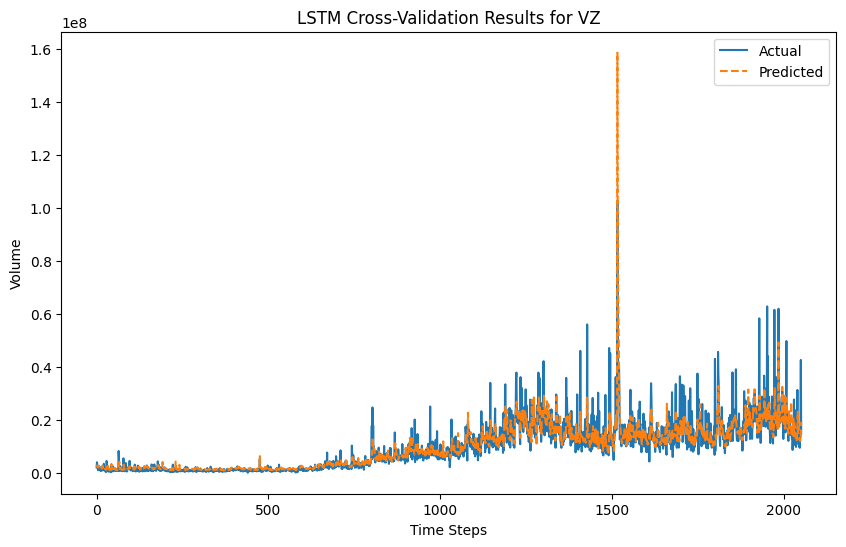

Cross-Validation Results for VZ:
Fold MSE: [17187040040804.105, 20681983456388.48, 20712508380005.727, 184033206849664.97, 20765348065244.855]
Average MSE: 52676017358421.6250
Results for AAPL:
Average MSE: 36887819200246800.0000


In [22]:
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler


# Cross-validation results storage
cv_results = {}

# Loop through each stock ticker in the dataset
for ticker in dow_jones_df['Ticker'].unique():
    stock_data = dow_jones_df[dow_jones_df['Ticker'] == ticker]['Volume'].values.reshape(-1, 1)

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    stock_data_scaled = scaler.fit_transform(stock_data)

    # Create sequences of 60 time steps
    def create_sequences(data, time_steps=60):
        X, y = [], []
        for i in range(time_steps, len(data)):
            X.append(data[i - time_steps:i, 0])
            y.append(data[i, 0])
        return np.array(X), np.array(y)

    time_steps = 60
    X, y = create_sequences(stock_data_scaled, time_steps)

    # Reshape input for LSTM
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # Perform K-Fold Cross Validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    fold_mse = []
    predictions_all_folds = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Build the LSTM model with Dropout to prevent overfitting
        model = Sequential([
            LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
            Dropout(0.2),
            LSTM(50, return_sequences=False),
            Dropout(0.2),
            Dense(25),
            Dense(1)
        ])

        # Compile the model
        model.compile(optimizer='adam', loss='mean_squared_error')

        # EarlyStopping to avoid overfitting
        early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        # Train the model
        model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stop])

        # Make predictions on the test fold
        predictions = model.predict(X_test)
        predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
        y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

        # Calculate and store MSE for this fold
        mse = mean_squared_error(y_test_actual, predictions)
        fold_mse.append(mse)

        # Store predictions for visualization
        predictions_all_folds.append((y_test_actual, predictions))

    # Store overall results for this stock
    cv_results[ticker] = {
        'mse': fold_mse,
        'avg_mse': np.mean(fold_mse),
        'predictions': predictions_all_folds
    }

    # Plot actual vs predicted for the last fold
    plt.figure(figsize=(10, 6))
    plt.plot(predictions_all_folds[-1][0], label='Actual')
    plt.plot(predictions_all_folds[-1][1], label='Predicted', linestyle='--')
    plt.title(f'LSTM Cross-Validation Results for {ticker}')
    plt.xlabel('Time Steps')
    plt.ylabel('Volume')
    plt.legend()
    plt.show()

    print(f"Cross-Validation Results for {ticker}:")
    print(f"Fold MSE: {fold_mse}")
    print(f"Average MSE: {np.mean(fold_mse):.4f}")

# Example: Access cross-validation results for a specific stock
ticker_example = list(cv_results.keys())[0]
print(f"Results for {ticker_example}:")
print(f"Average MSE: {cv_results[ticker_example]['avg_mse']:.4f}")


# Prepare to store results
lstm_results = {}

# Loop through each stock ticker in the dataset
for ticker in dow_jones_df['Ticker'].unique():
    stock_data = dow_jones_df[dow_jones_df['Ticker'] == ticker]['Volume'].values.reshape(-1, 1)

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    stock_data_scaled = scaler.fit_transform(stock_data)

    # Create sequences of 60 time steps
    def create_sequences(data, time_steps=60):
        X, y = [], []
        for i in range(time_steps, len(data)):
            X.append(data[i - time_steps:i, 0])
            y.append(data[i, 0])
        return np.array(X), np.array(y)

    time_steps = 60
    X, y = create_sequences(stock_data_scaled, time_steps)

    # Split into training and testing sets (80-20)
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Reshape input to be [samples, time steps, features]
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Build the LSTM model
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        LSTM(50, return_sequences=False),
        Dense(25),
        Dense(1)
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1)

    # Make predictions
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

    # Inverse transform actual values
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Store results
    lstm_results[ticker] = {
        'model': model,
        'predictions': predictions,
        'actual': y_test_actual
    }

    # Plot actual vs predictions
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_actual, label='Actual')
    plt.plot(predictions, label='Predicted', linestyle='--')
    plt.title(f'Trade Volume Forecast with LSTM for {ticker}')
    plt.xlabel('Time Steps')
    plt.ylabel('Volume')
    plt.legend()
    plt.show()

# Example: Access LSTM predictions for a specific stock
ticker_example = list(lstm_results.keys())[0]
print(f"LSTM Predictions for {ticker_example}:")
print(lstm_results[ticker_example]['predictions'][:5])